# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# auto-tidy up of code
%load_ext nb_black

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn aesthethic settings.
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.1)

# Python, please display the plots
%matplotlib inline

# Display values up to 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Statistical analyses
import scipy.stats as stats
import statsmodels.stats.proportion as proportion

# Randomized data splitting
from sklearn.model_selection import train_test_split

# Build linear regression model and checks
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
data = pd.read_csv("used_device_data.csv")
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.00,5.00,64.00,3.00,3020.00,146.00,2020,127,4.31,4.72
1,Honor,Android,17.30,yes,yes,13.00,16.00,128.00,8.00,4300.00,213.00,2020,325,5.16,5.52
2,Honor,Android,16.69,yes,yes,13.00,8.00,128.00,8.00,4200.00,213.00,2020,162,5.11,5.88
3,Honor,Android,25.50,yes,yes,13.00,8.00,64.00,6.00,7250.00,480.00,2020,345,5.14,5.63
4,Honor,Android,15.32,yes,no,13.00,8.00,64.00,3.00,5000.00,185.00,2020,293,4.39,4.95


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [4]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [5]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.00,NaN,NaN,NaN,13.71,3.81,5.08,12.70,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.00,NaN,NaN,NaN,9.46,4.82,0.08,5.00,8.00,13.00,48.00
selfie_camera_mp,3452.00,NaN,NaN,NaN,6.55,6.97,0.00,2.00,5.00,8.00,32.00
int_memory,3450.00,NaN,NaN,NaN,54.57,84.97,0.01,16.00,32.00,64.00,1024.00
ram,3450.00,NaN,NaN,NaN,4.04,1.37,0.02,4.00,4.00,4.00,12.00
battery,3448.00,NaN,NaN,NaN,3133.40,1299.68,500.00,2100.00,3000.00,4000.00,9720.00


<IPython.core.display.Javascript object>

In [6]:
data.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
data.release_year.mode()

0    2014
Name: release_year, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
data.drop_duplicates().shape == data.shape

True

<IPython.core.display.Javascript object>

**Observations:**

* Dataset has 3454 rows (with no duplicates) and 15 columns
* Data types seem to be OK and coherent with the descriptions in the dictionary, apparently there are no "dirty" values (like numerical columns with commas or currency symbols).
* Some missing values, mostly in the main_camera_mp column. Also some of them in the selfie_camera_mp, int_memory, ram, battery, and weight columns.
* The brand most repeated is "Others", so there's not much information for this column in this statistical summary.
* Most devices run on Android OS.
* The majority of devices support 4G, but most don't support 5G.
* Screen sizes range between 5.08 and 30.71 cm with a mean of 13.71 and a median of 12.83 (suggests right skew). It's assumed biggest screens correspond to tablets, but there's no categorical variable informing us which device is a phone and which is a tablet.
* Main camera ranges from 0.08 to 48 Mp; Both values seem extreme, but 48 Mp is not unheard of. The mean value is 9.46 and the median is 8 Mp (suggests right skew).
* Selfie Camera ranges from 0 (meaning no camera?) to 32 Mp. The mean value is 6.55 and the median is 8 Mp (suggests left skew).
* Internal memory ranges from 0.01 to 1024 GB. The mean is 54.57 and the median 64 GB (left skew)
* RAM memory ranges from 0.02 to 12 GB. At least 50% of the devices listed have 4 GB RAM and the mean is almost that value.
* Battery capacity ranges between 500 and 9720 mAh, with a mean of 3133.4 and a median of 3000.
* Weight ranges between 69 and 855 g, with a mean of 182.75 and a median of 160 grams. The IQR tells us that 50% of devices listed range between 142 and 185 grams.
* Release year ranges between 2013 and 2020. Half of the devices listed range between the years 2014 and 2018. The most repeated year of release is 2014.
* Days used ranges from 91 to 1094 days, with a mean of 674.87 days and a median of 690.5 days.
* The normalized price (used) ranges from 1.54 to 6.62 euro. 50% devices range from 4.03 to 4.76 euro. The mean and median are similar, so the distribution could be close to normal (with a very slight left skew).
* The normalized price (new) ranges from 2.90 to 7.85 euro. 50% devices range from 4.79 to 5.67 euro. The mean and median are similar, so the distribution could be close to normal (with a slight left skew).

* There might be outliers and incorrect values, those will be discussed ahead.

In [9]:
# making lists of numerical and categorical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
cat_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()

<IPython.core.display.Javascript object>

In [10]:
num_cols

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

<IPython.core.display.Javascript object>

In [11]:
cat_cols

['brand_name', 'os', '4g', '5g']

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [12]:
# auxiliary functions for visualization (Source: MLS course materials, personalized)

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,  # Number of rows of the subplot grid
                                        sharex = True,  # x-axis will be shared among subplots
                                        gridspec_kw = {"height_ratios": (0.3, 0.7)},
                                        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data = data, 
                x = feature, 
                ax = ax_box2, 
                showmeans = True, 
                color="#b7c9e2")  # boxplot will be created and a triangle will indicate the mean value of the column
    
    sns.histplot(data=data, 
                 x=feature, 
                 kde=kde, 
                 ax=ax_hist2, 
                 bins=bins, 
                 color='#f28500') if bins else sns.histplot(data=data, 
                                                            x=feature, 
                                                            kde=kde, 
                                                            ax=ax_hist2,
                                                            color='#f28500')  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram



<IPython.core.display.Javascript object>

In [13]:
# auxiliary functions for visualization (Source: MLS course materials) part 2


def labeled_barplot(data, feature, size=6, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    size: size factor (6 is default)
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + int(size / 4), size))
    else:
        plt.figure(figsize=(n + int(size / 4), size))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="colorblind",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

<IPython.core.display.Javascript object>

### Questions:

#### 1. What does the distribution of normalized used device prices look like?

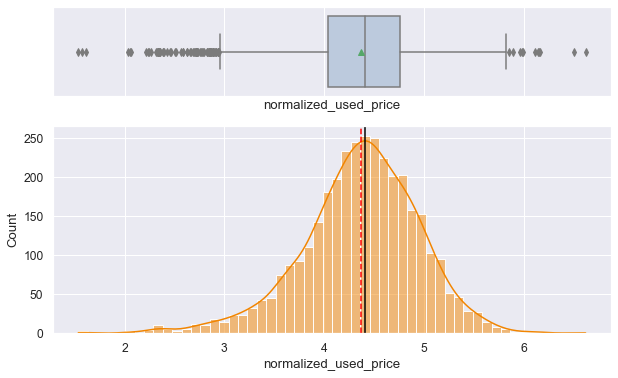

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "normalized_used_price", figsize=(10, 6), kde=True)

**Observation:**

* The distribution of the normalized used price looks almost normally distributed, with a slight skew to the left.

#### 2. What percentage of the used device market is dominated by Android devices?

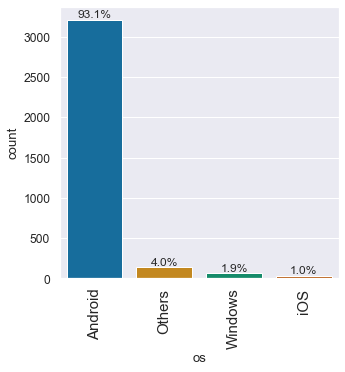

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "os", size=5, perc=True)

**Observation:**

* As the result displayed in the plot points out, the percentage participation of Android devices in the used device market is 93.1%.

#### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

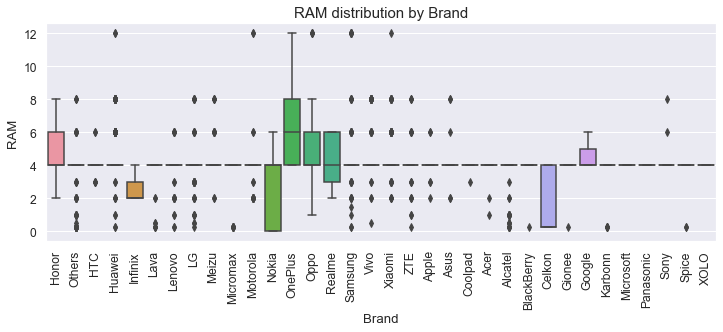

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.title("RAM distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("RAM")
plt.show()

**Observation:**

* Most brands show a median and IQR for RAM memory as equal to 4 GB.
* The brands Infinix, Nokia, and Ceikon show the IQR for their devices' RAM distributed under 4 GB.
* On the other side, for the brands Honor, OnePlus, Oppo and Google the IQR o¿is over 4 GB.
* The brand Realme devices have a median of 4 GB and the IQR ranges between about 3 and 6 GB.
* Some brands show a bunch of devices with "outlier" RAM values, under and over 4 GB.

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [17]:
data_bat_4500 = data[data["battery"] > 4500]
print(
    "Observation:\nThere are",
    data_bat_4500.shape[0],
    "devices with more than 4500 mAh of battery capacity",
)

Observation:
There are 341 devices with more than 4500 mAh of battery capacity


<IPython.core.display.Javascript object>

In [18]:
data_bat_4500["weight"].describe()

count   341.00
mean    332.28
std     155.50
min     118.00
25%     198.00
50%     300.00
75%     467.00
max     855.00
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

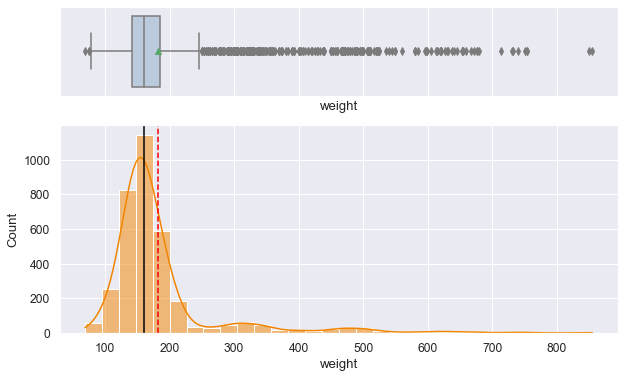

<IPython.core.display.Javascript object>

In [19]:
# for comparison, let's visualize the distribution of weight for the complete dataset
histogram_boxplot(data, "weight", figsize=(10, 6), kde=True, bins=30)

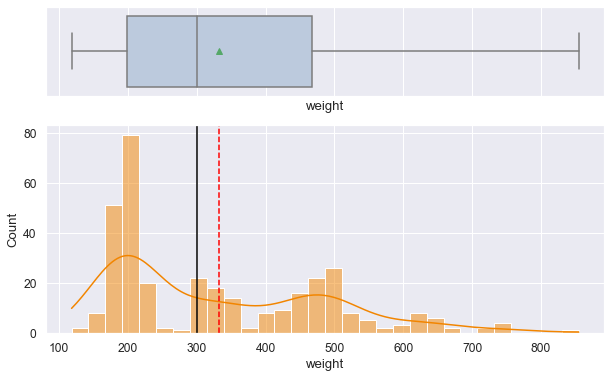

<IPython.core.display.Javascript object>

In [20]:
# subset of battery cap > 4500 mAh
histogram_boxplot(data_bat_4500, "weight", figsize=(10, 6), kde=True, bins=30)

**Observation:**

* The weight for this subset of devices ranges between 118 and 855 g, with a mean of 332.28 and a median of 300 grams. Half the devices weigh between 198 nd 467 grams.
* In contrast, the weight for the whole dataset (info from dataset statistical summary) ranges between 69 and 855 g, with a mean of 182.75 and a median of 160 grams. The IQR tells us that 50% of devices listed range between 142 and 185 grams.
* On average, devices with more than 4500 mAh of battery capacity weigh more than the complete set and the distribution is more spread out, with a "fatter" right tail and no outliers.

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [21]:
# 6 inches to cm
min_size = 6 * 2.54

# sub set with screens over 6 inches
data_scr_6in = data[data["screen_size"] > min_size]
print(
    "Observation:\nThere are a total of",
    data_scr_6in.shape[0],
    "devices with screens bigger than 6 in",
)

Observation:
There are a total of 1099 devices with screens bigger than 6 in


<IPython.core.display.Javascript object>

In [22]:
# Let's answer the question with a list of number of devices with more than 6 in screen by brand.
data_scr_6in.groupby("brand_name")["brand_name"].count().sort_values(ascending=False)

brand_name
Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Gionee         3
XOLO           3
Coolpad        3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

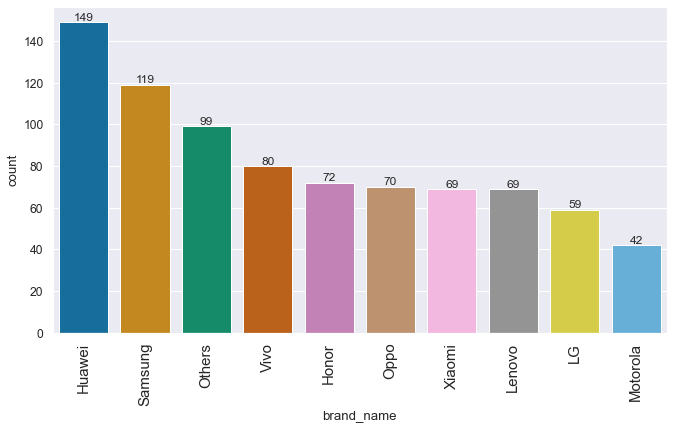

<IPython.core.display.Javascript object>

In [23]:
# visualizing the top 10 brands among this subset
labeled_barplot(data_scr_6in, "brand_name", n=10)

**Observation:**

* Of 1099 devices with screens bigger than 6 in, a big proportion belongs to the top 10 brands: Huawei, Samsung, Others, Vivo, Honor, Oppo, Xiaomi, Lenovo, LG, and Motorola.
* The series and visualization point out the quantity of devices from each brand.

#### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [24]:
# sub set with selfie cameras over 8 MP
data_selfcam_8MP = data[data["selfie_camera_mp"] > 8]
print(
    "Observation:\nThere are a total of",
    data_selfcam_8MP.shape[0],
    "devices with selfie cameras with over 8MP",
)

Observation:
There are a total of 655 devices with selfie cameras with over 8MP


<IPython.core.display.Javascript object>

In [25]:
# Let's answer the question with a list of number of devices with more than 8MP selfie cams by brand.
data_selfcam_8MP.groupby("brand_name")["brand_name"].count().sort_values(
    ascending=False
)

brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
ZTE           20
HTC           20
OnePlus       18
Realme        18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
Micromax       2
Panasonic      2
BlackBerry     2
Acer           1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

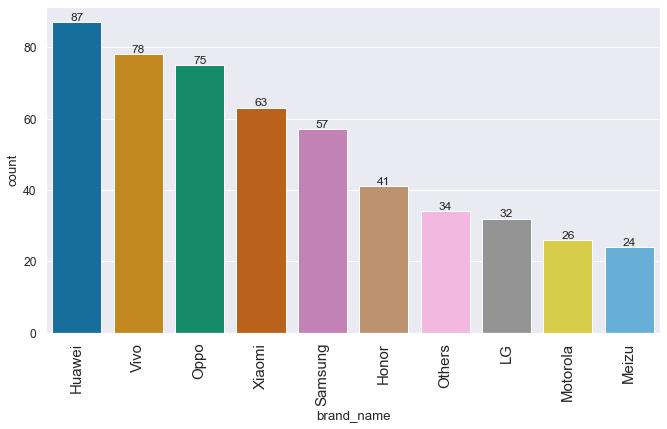

<IPython.core.display.Javascript object>

In [26]:
# visualizing the top 10 brands among this subset
labeled_barplot(data_selfcam_8MP, "brand_name", n=10)

**Observation:**

* Of 655 devices with selfie cameras with more than 8 MP, a big proportion belongs to the top 10 brands: Huawei, Vivo, Oppo, Xiaomi, Samsung, Honor, Others, LG, Motorola, Meizu
* The series and visualization point out the quantity of devices from each brand.

#### 7. Which attributes are highly correlated with the normalized price of a used device?

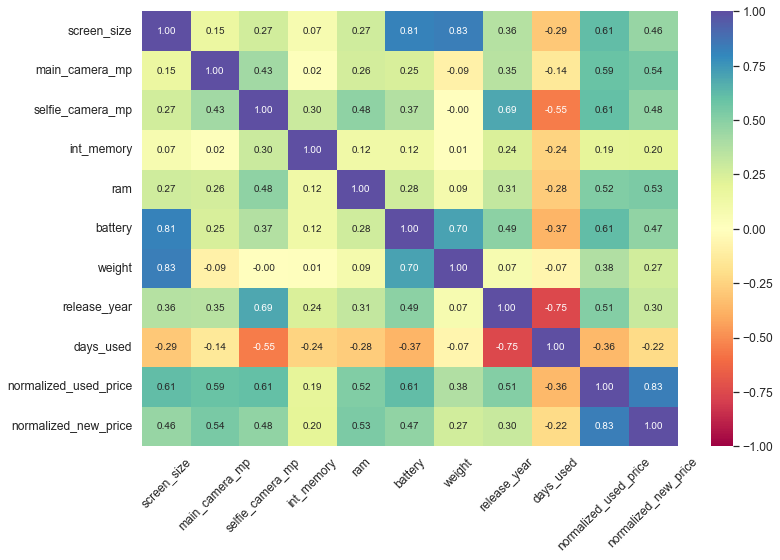

<IPython.core.display.Javascript object>

In [27]:
# Checking the correlations between numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.xticks(rotation=45)
plt.show()

**Observation:**

* Among numerical variables, the normalized new price is the one most strongly correlated (positively) with the normalized used price.
* Other numerical variables with significative positive correlation are: Screen Size, Main camera MP, Selfie camera MP, RAM memory, Battery capacity.
* The release year is also correlated with the used device price (the newer it is, the better priced it is).
* The variable internal memory (ROM) and weight show weak positive correlation with the used device price.
* Finally, the days used variable shows a weak negative correlation with the used device price. Just from this observation, it seems that the model year is more strong as a pricing signal for an used device.

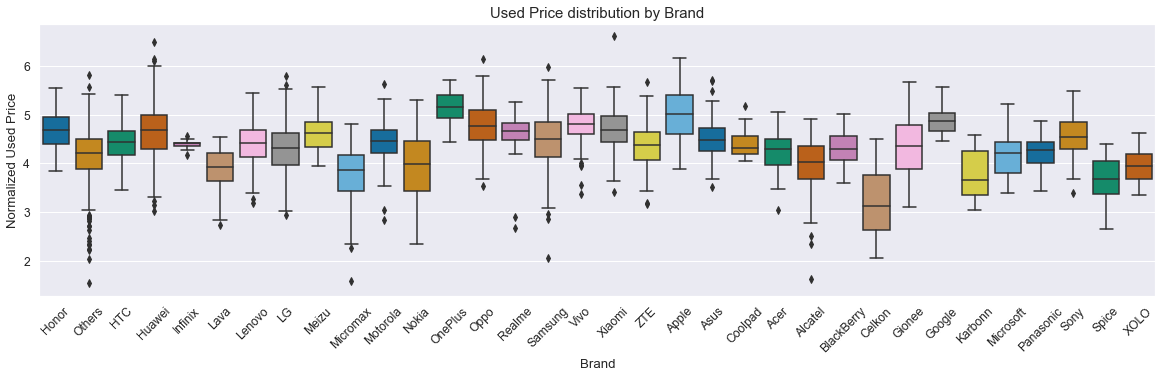

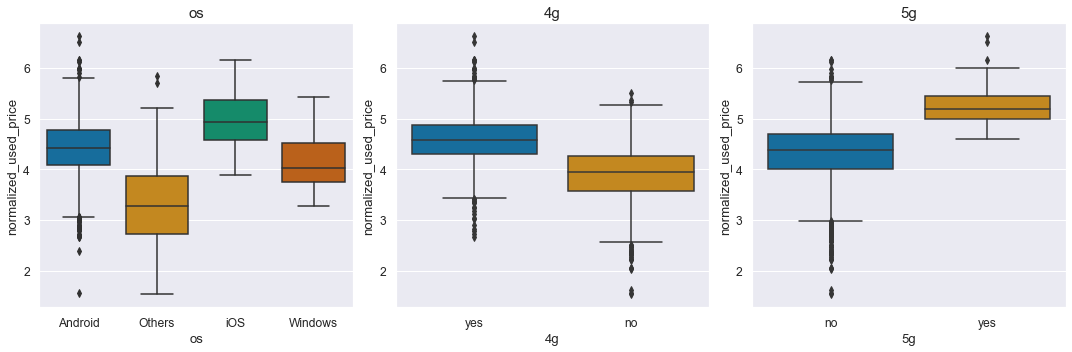

<IPython.core.display.Javascript object>

In [28]:
# checking a relationship between the used device price and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="normalized_used_price", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Used Price distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Normalized Used Price")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="normalized_used_price", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* The normalized used device price seem to vary with each categorical variable.
* The strongest variations are observed between operating systems. iOS devices show the highest prices, while "other" OS' show the lowest ones. Android and Windows devices don't show a big difference between them both.
* Devices with 4G show higher prices than those with no 4G.
* Likewise, devices with 5G capabilities show higher prices than those with no 5G.
* Brands that show apparently higher prices than most brands are: OnePlus, Apple, and Google. Brands that show cheaper prices are Macromax, Nokia, Celkon and Karbonn, among others.
* Considering the extreme values (outliers), the most expensive used devices are from the brands Huawei and Xiaomi and equipped with Android OS.

### Detail of univariate analysis for Numerical Variables:

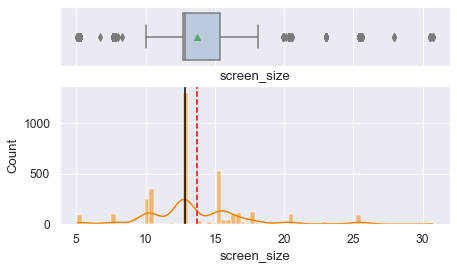

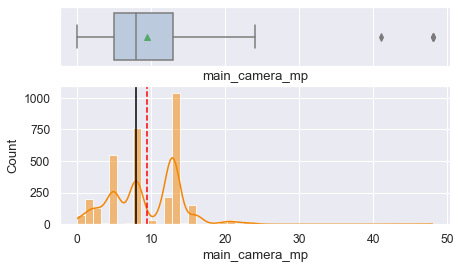

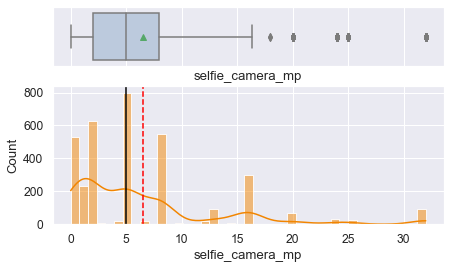

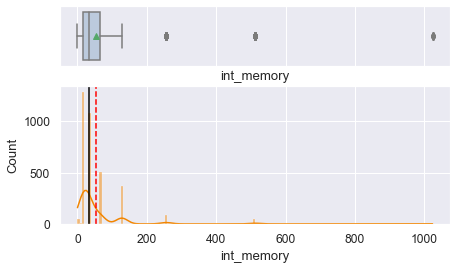

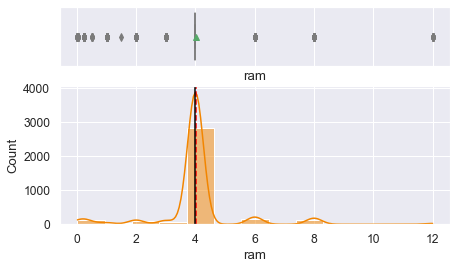

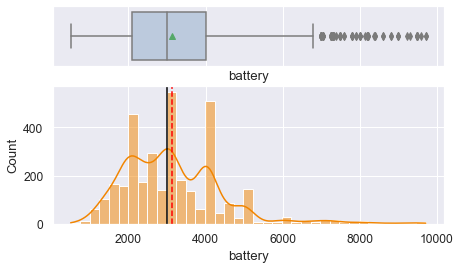

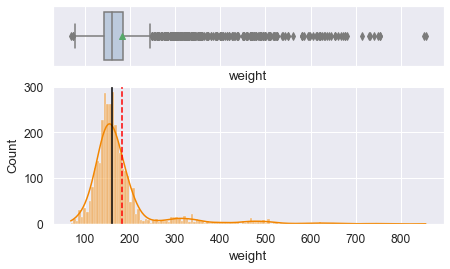

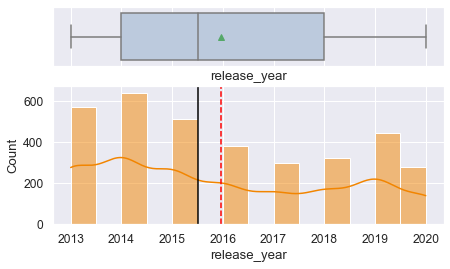

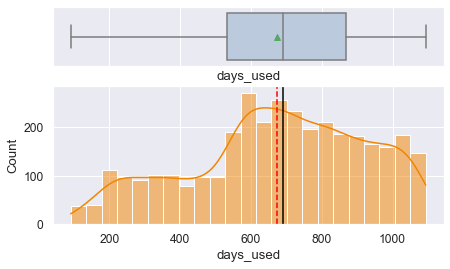

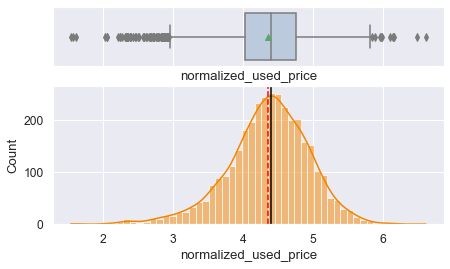

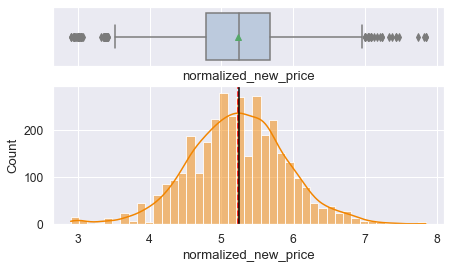

<IPython.core.display.Javascript object>

In [29]:
for cat in num_cols:

    histogram_boxplot(data, cat, figsize=(7, 4), kde=True)

**Observations (univariate analysis- numerical variables):**

* **screen_size** shows a very spread out distribution with lots of "outliers" and a moderate right skew. "outliers" with screens bigger than 20 cm could be considered as tablets.
* **main_camera_mp** shows some extreme outliers at the higher end, with a right skewed distribution. It also shows some very low values that are not indicated as outliers but merit more analysis.
* **selfie_camera_mp** shows outliers at the higher end and a right skew.
* **int_memory** has an extremely right skewed distirbution with a few outliers along a long, thin right tail.
* **ram** shows a leptokurtic (pointy with thin tails) distribution. Due to a lot of devices having 4 GB RAM, almost every other value looks like an "outlier".
* **battery** shows a right-skewed distrirbutio with a long right tail, showing a bunch of outliers. All in all, 75% of devices have a battery capacity higher than 2000 mAh.
* **weight** has an almost normal distribution if not for the long right tail that skews it right. Consequently, a lot of values towards the right are interpreted as outliers as per the 1.5 IQR criterium. 75% of devices weigh less than 200 grams.
* **release_year** is not really a continuous numerical variable but it's convenient to treat it as if it were. The distribution of release year for the devices show that the most repeated year is 2014, with half the devices being from 2015 or older, and the "mean" year being around 2015-2016, means that (as of 2021) the mean "age" of the devices is about 5.5 years.
* **days_used** shows an almost uniform distribution until the lower end of its IQR (P25, about 533 days), where it doubles the relative frequency before going down until the max value. The result is a moderately left skewed distribution.
* **normalized_used_price**: distribution looks almost normally distributed, with a slight skew to the left. 75% of devices show a price higher than 4 euros.
* **normalized_new_price**: distribution looks almost normally distributed, with a better symmetry than the used device price variable. On average, normalized new prices are about 0.8 euro higher than normalized used prices.

Unfortunately we don't have the original prices data. It would be useful to engineer a new feature: price discount (new price minus new price, be it absolute or relative).

### Univariate Analysis for Categorical Variables:

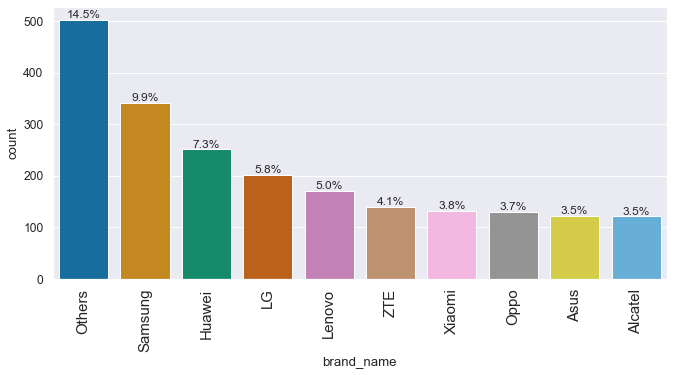

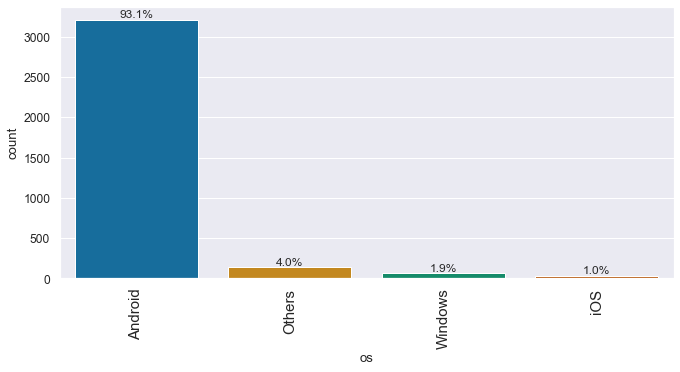

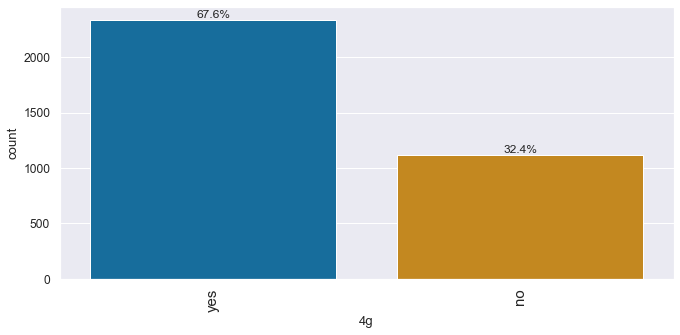

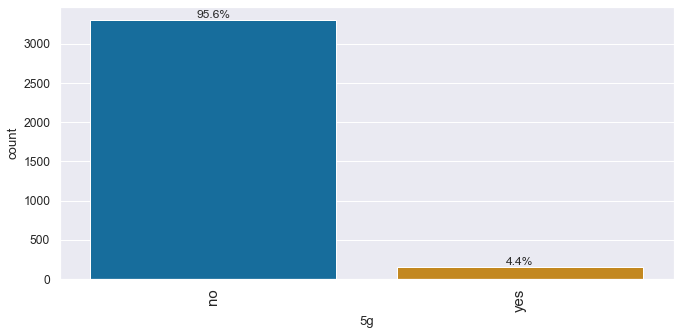

<IPython.core.display.Javascript object>

In [30]:
for cat in cat_cols:

    labeled_barplot(
        data, cat, size=5, perc=True, n=10
    )  # only top 10 brands are displayed

**Observations (univariate analysis- numerical variables):**

* **brand_name** shows that among named brands, the top 3 in quantity of devices in the set are Samsung (9.9%), Huawei (7.3%) and LG (5.8%). If this set was representative of the market of used devices, it could be said that these three brands are the most popular.
* **os** distribution shows that by far Android is the most popular operating system (93.1% of devices), at least for used handhelds.
* **4g** variable shows that about two thirds (67.6%) of the devices in the dataset have 4G capabilities.
* On the other side, **5g** shows that only 4.4% of the devices are 5G-capable.

### Multivariate Analysis:

In the first place, let's check the correlations between numerical variables again:

#### Correlation Heatmap:

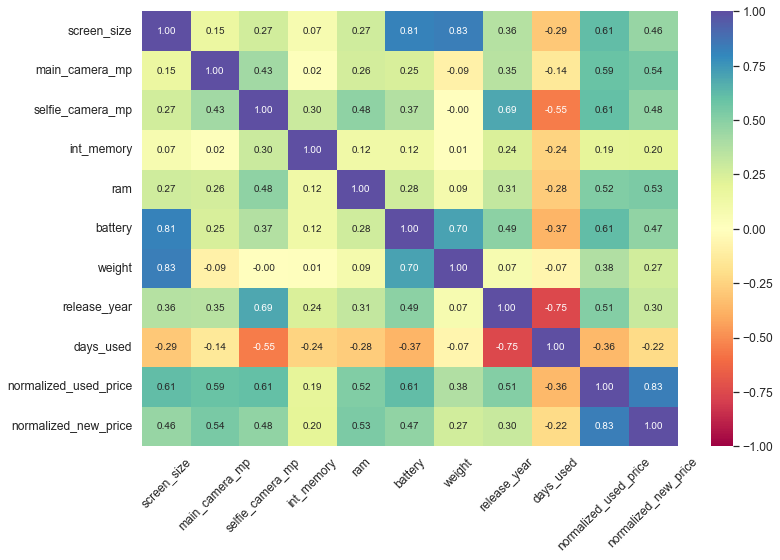

<IPython.core.display.Javascript object>

In [31]:
# Checking the correlations between numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.xticks(rotation=45)
plt.show()

**Observations from Correlation Heatmap:**

* Correlations with the target variable, **normalized_used_price** (from a previous analysis):
    * **normalized_new_price**: strong and positive correlation.
    * **screen_size**, **main_camera_mp**, **selfie_camera_mp**, **ram**, **battery**, **release_year**: positive correlation.
    * **int_memory**, **weight**: weak and positive correlation.
    * **days_used**: weak and negative correlation.

* Other correlations worth mentioning:
    * **normalized_new_price** shows similar correlations with other numerical variables as **normalized_used_price**.
    * **screen_size**, **battery** and **weight** are strongly and positively correlated among them. This can become relevant when deciding which variables to drop if collinearity appears during the build up of the LR model.
    * **release_year** and **days_used** are strongly negatively correlated, which is almost self-evident.
    * Almost all features show some degree of positive correlation with **release_year** (and negative with **days_used**), especially **selfie_camera_mp**, which makes sense. Selfie cameras have been improving with time (but curiously, the relationship of the release year vs the main camera MP's is weaker).
    * **main_camera_mp** and **selfie_camera_mp** show a positive, but not strong correlation.
    * **int_memory** shows weak correlations with every other variable.
    * The strongest correlation of **ram**, apart from the price variables, is with **selfie_camera_mp**.
    
Next let's further visualize the variables that show significative correlation with the target variable:

#### Numerical Variable Pairplot:

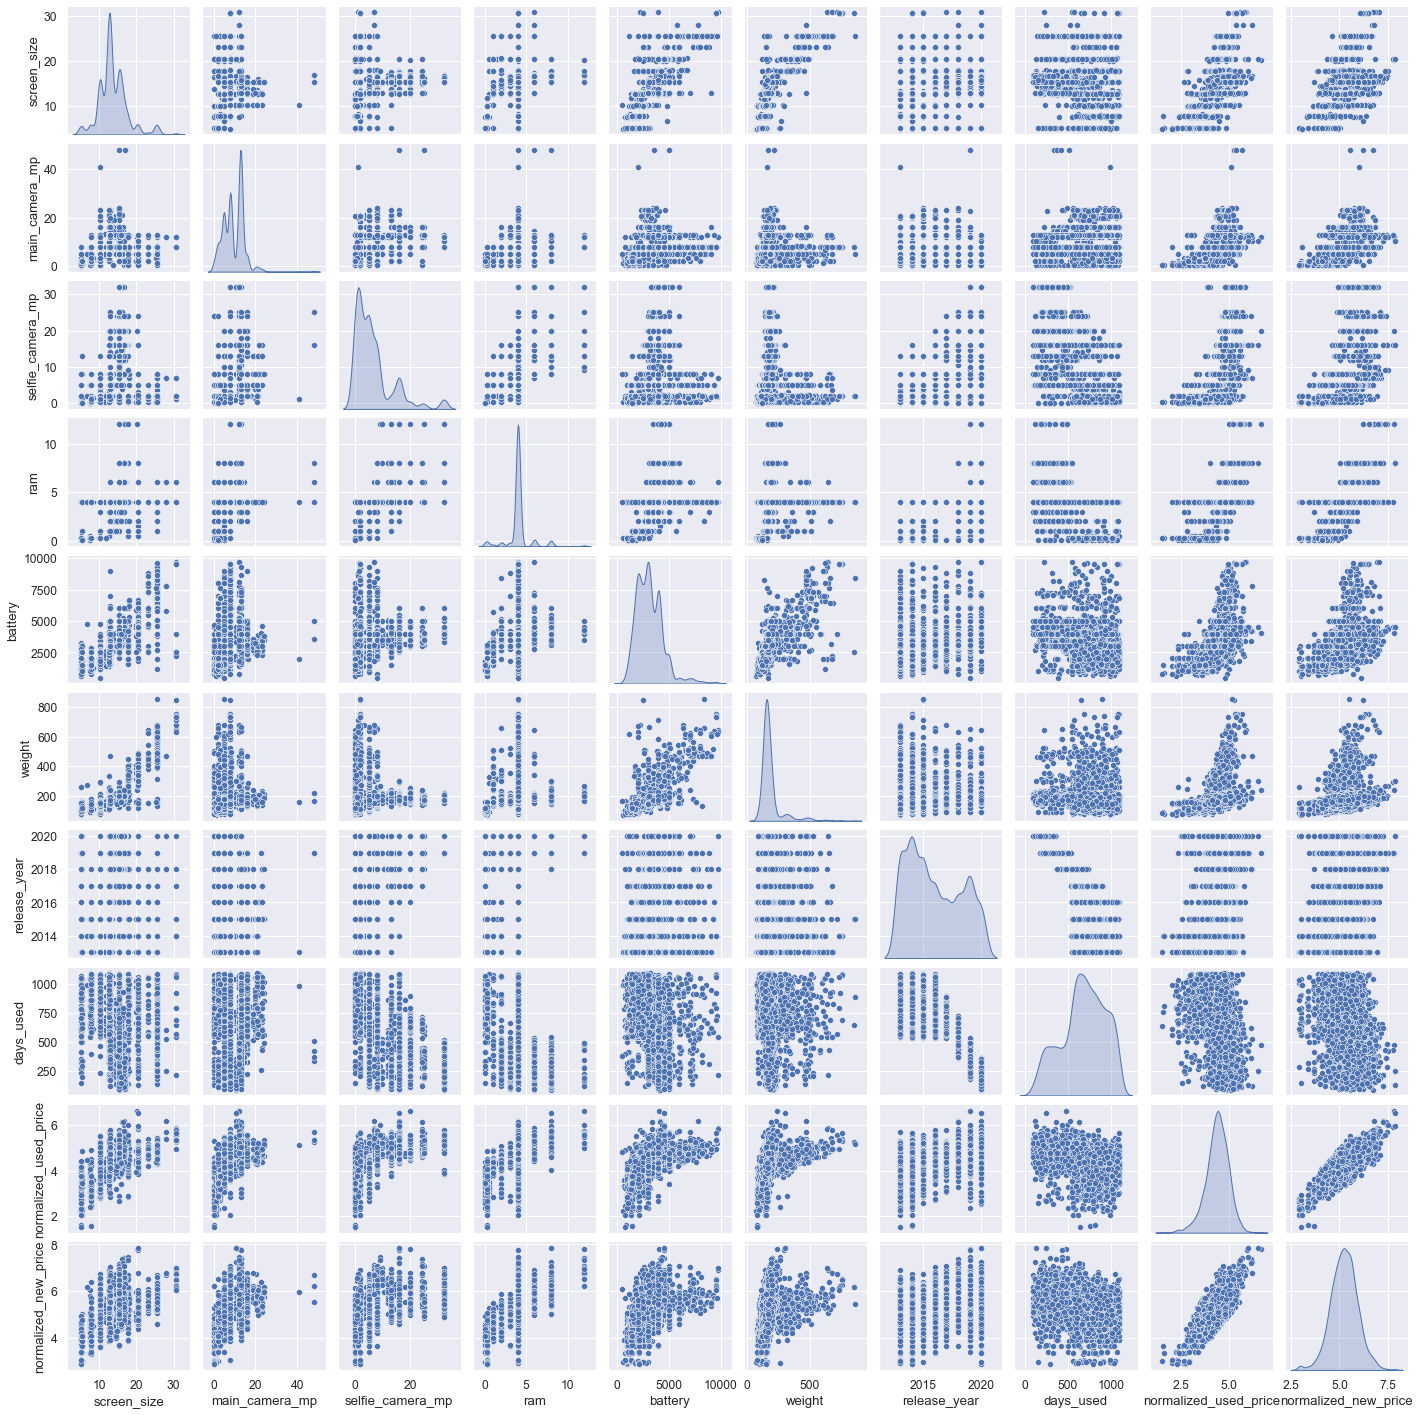

<IPython.core.display.Javascript object>

In [32]:
# checking the shape of the relationship for numerical columns that show significative correlation with used price

pair_cols = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "ram",
    "battery",
    "weight",
    "release_year",
    "days_used",
    "normalized_used_price",
    "normalized_new_price",
]

sns.pairplot(data[pair_cols], diag_kind="kde", height=2)
plt.show()

**Observations from Pairplot:**

* A strong linear relationship between both price variables can be deducted from the visualization.
* Also non strictly linear relationship between price variables and the variables **screen_size**, **main_camera_mp**, **selfie_camera_mp**, **ram**, **battery** and **weight**.
* The relationship between the price variables vs **days_used** looks weak, while **release_year** shows some strong relationship between the release years 2017 and 2020. Older devices' prices (released before 2017) don't seem to be affected by age.
* Other relationship pairings confirm the observations from the correlation heatmap.
* Some of the scatter plots (weight vs price; screen size vs selfie cam MP as examples) hint at the presence of clusters, but we don't have enough data or tools at this point to confirm it.

#### Relationship between numerical and categorical variables

##### Used Price vs Categorical Variables

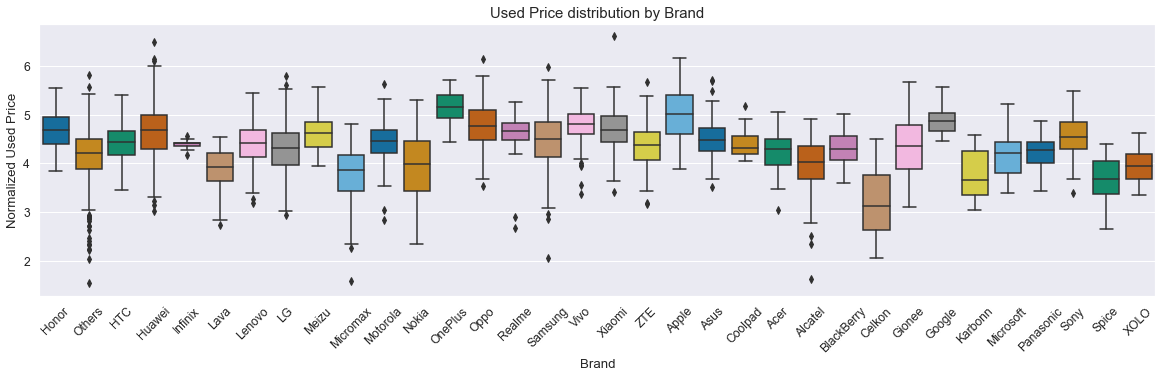

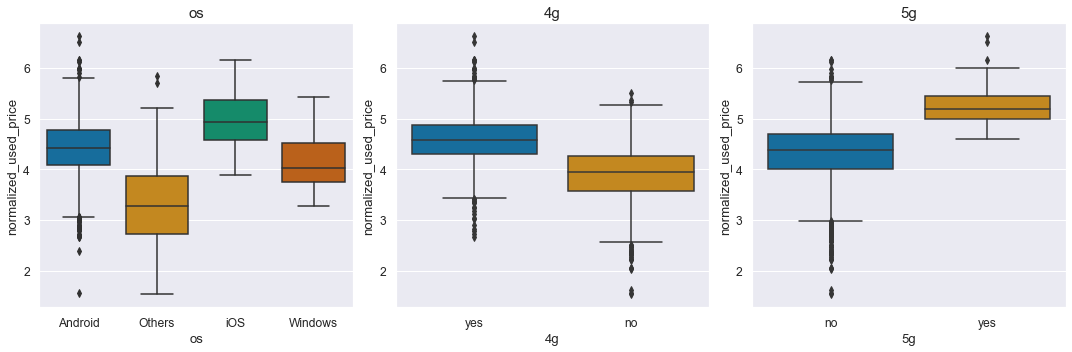

<IPython.core.display.Javascript object>

In [33]:
# checking a relationship between the used device price and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="normalized_used_price", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Used Price distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Normalized Used Price")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="normalized_used_price", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations (repeated from EDA question N° 7):**

* The normalized used device price seem to vary with each categorical variable.
* The strongest variations are observed between operating systems. iOS devices show the highest prices, while "other" OS' show the lowest ones. Android and Windows devices don't show a big difference between them both.
* Devices with 4G show higher prices than those with no 4G.
* Likewise, devices with 5G capabilities show higher prices than those with no 5G.
* Brands that show apparently higher prices than most brands are: OnePlus, Apple, and Google. Brands that show cheaper prices are Macromax, Nokia, Celkon and Karbonn, among others.
* Considering the extreme values (outliers), the most expensive used devices are from the brands Huawei and Xiaomi and equipped with Android OS.

##### Screen Size vs Categorical Variables

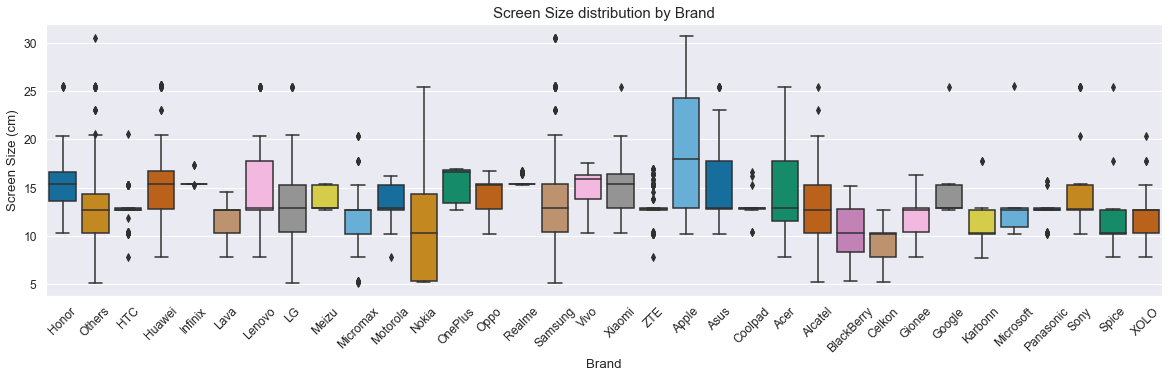

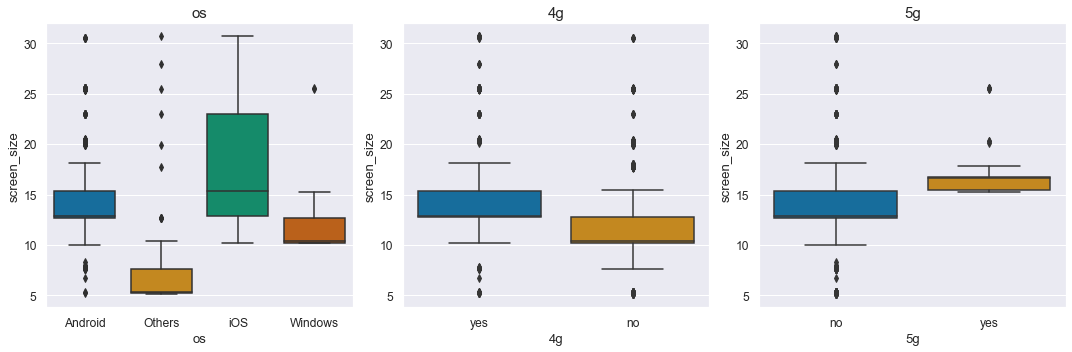

<IPython.core.display.Javascript object>

In [34]:
# checking a relationship between screen size and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="screen_size", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Screen Size distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Screen Size (cm)")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="screen_size", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* The device screen sizes seem to vary with each categorical variable.
* The strongest variations are observed between operating systems. iOS devices show the biggest screens, followed by Android and Windows devices, while "other" OS' show the lowest ones.
* Devices with 4G show bigger screens on average than those with no 4G.
* Likewise, devices with 5G capabilities show bigger screens than those with no 5G.
* Most screen sizes sem to fluctuate between 10 and about 15 cm.
* Apple stands out because of its distribution of screen size, where the bulk of devices seem bigger than average.
* conversely, Nokia's devices screen sizes look smaller on average.

##### Main Camera MP vs Categorical Variables

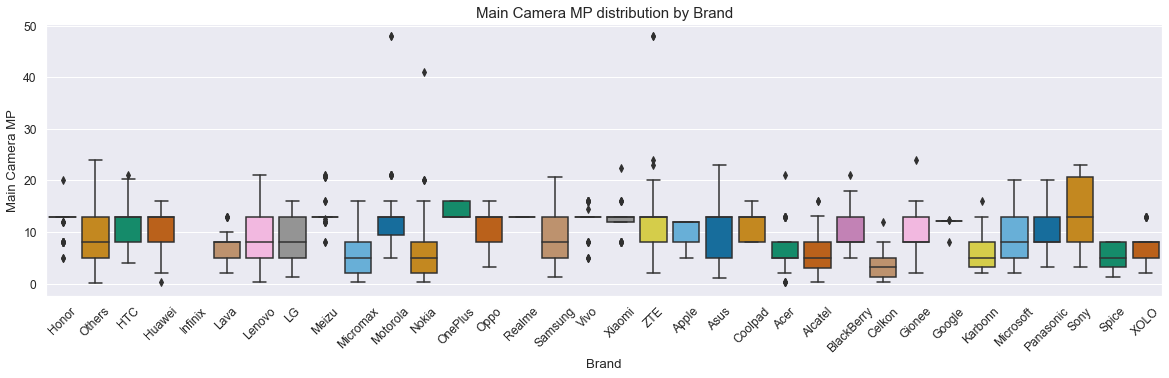

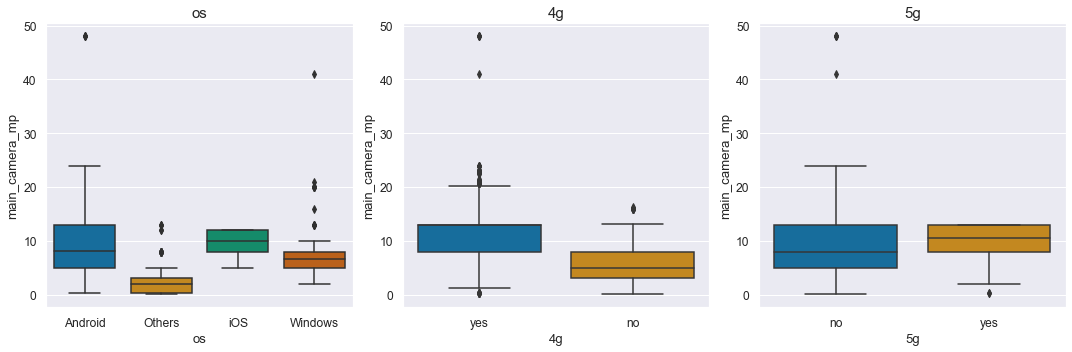

<IPython.core.display.Javascript object>

In [35]:
# checking a relationship between main camera MP and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="main_camera_mp", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Main Camera MP distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Main Camera MP")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="main_camera_mp", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* The camera MP's seem to vary in a significant way with OS and 4G capability, but not much across brands or 5G capacity.
* iOS and Android devices have the cameras with highest MP's, followed by Windows. Other OS' show the least camera MP's.
* Devices with 4G have better cameras on average than those with no 4G.
* The bulk of devices' main cameras seem to have about 15 MP or less. For a few brands, like OnePlus and Sony, the IQR spans higher values.
* Brands like Micromax, Nokia, Celkon, Spice, XOLO and Karbonn, among others, show consistently lower values for their main cameras' MPs.

##### Selfie Camera MP vs Categorical Variables

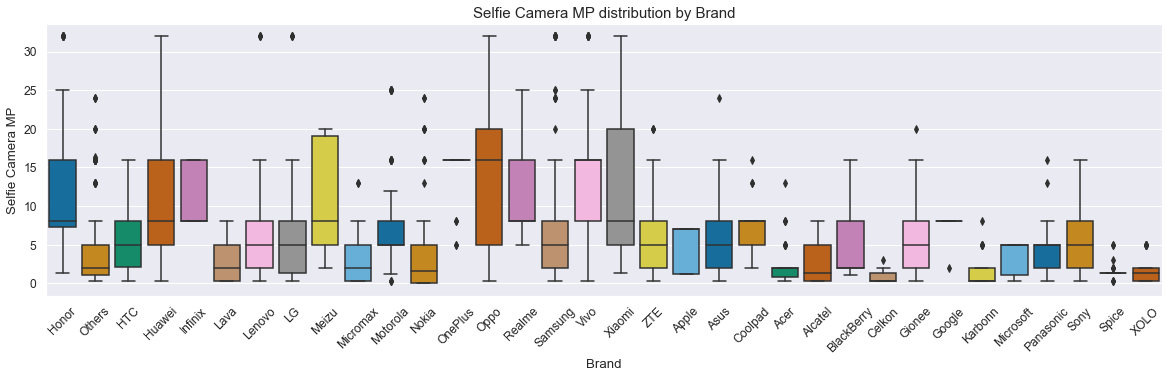

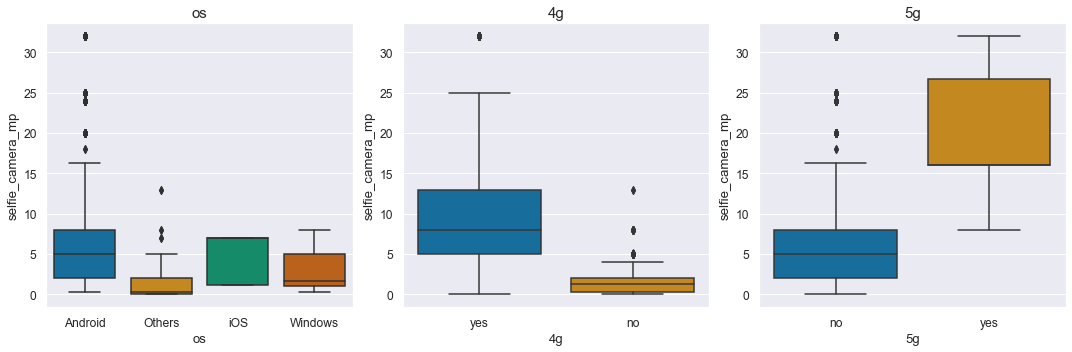

<IPython.core.display.Javascript object>

In [36]:
# checking a relationship between selfie camera MP and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="selfie_camera_mp", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Selfie Camera MP distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Selfie Camera MP")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="selfie_camera_mp", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* The camera MP's seem to vary in a significant way across all categorical variables.
* The bulk of iOS, Windows and Android OS devices have very similar selfie camera MP distributions (but Android has more high end units, including sime outliers). Other OS' show the least camera MP's.
* Devices with 4G have better cameras on average than those with no 4G. The same thing happens in regard to 5G capability.
* Selfie camera MP's show way more variance across brands than the main camera. The selfie cameras of the brans Honor, Huawei, Infinix, Meizu, Oppo, Realme, Vivo, and Xiaomi, show consistently higher values than the rest.
* On the other side, some brands like Lava, Micromax, Nokia, Acer, Celkon, Karbonn, XOLO, among others, show consistently lower values for their selfie cameras' MPs.
* The bulk of brands seem to have, for most of its devices, selfie cameras under 8 MP.

##### Internal Memory vs Categorical Variables

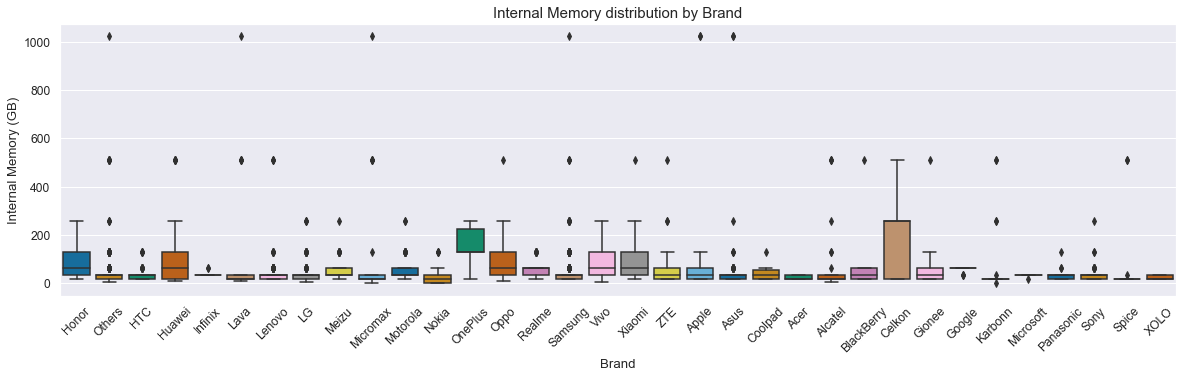

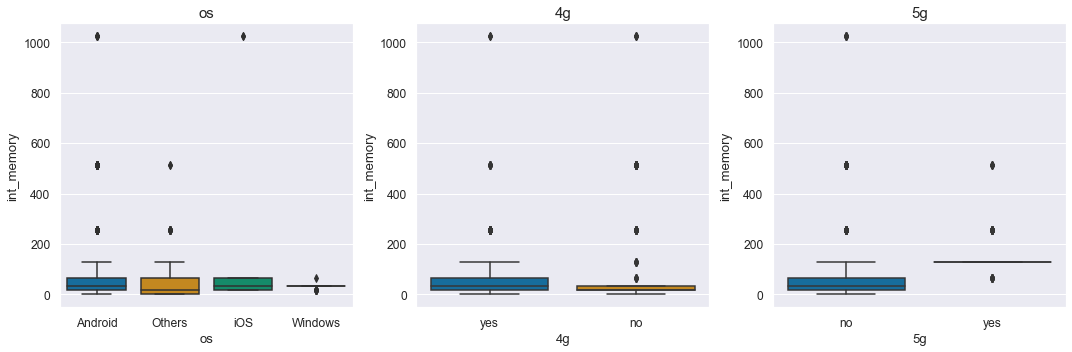

<IPython.core.display.Javascript object>

In [37]:
# checking a relationship between internal memory and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="int_memory", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Internal Memory distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Internal Memory (GB)")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="int_memory", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* The Internal Memory (ROM) doesn't seem to vary much across categorical variables, with some exceptions (5G capacity, some brands)
* 5G-capable devices seem to have more internal memory on average.
* Brands like Honor, Huawei, OnePlus, Oppo, Celkon, among others, seem to show internal memory distributions that spread to higher values.
* This variable has some extreme outliers that distort the analysis.

##### RAM Memory vs Categorical Variables

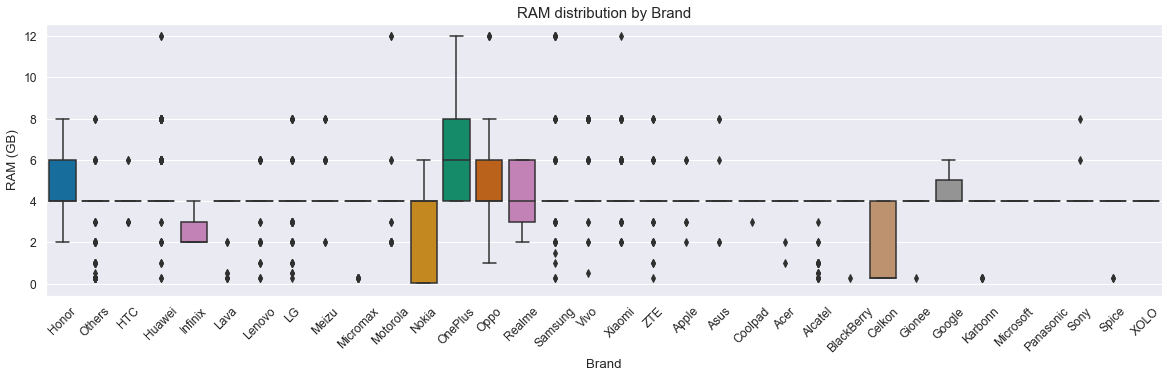

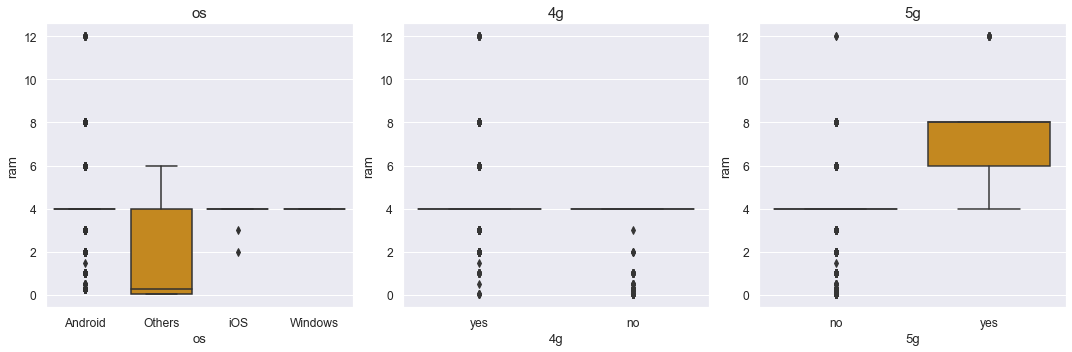

<IPython.core.display.Javascript object>

In [38]:
# checking a relationship between RAM memory and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="ram", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("RAM distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("RAM (GB)")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="ram", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* The RAM memory variable, as stated before, has most devices spread across a tiny range (most have 4 GB RAM). A lot of higher and lower values look like outliers.
* 5G-capable devices seem to have more RAM memory on average.
* As for OS, devices with "Other" OS seem to have less RAM on average.
* Brands like Honor, OnePlus, Oppo, Google, among others, seem to have higher values for RAM memory, while brands like Infinix, Nokia, and Celkon have lower values.

##### Battery Capacity vs Categorical Variables

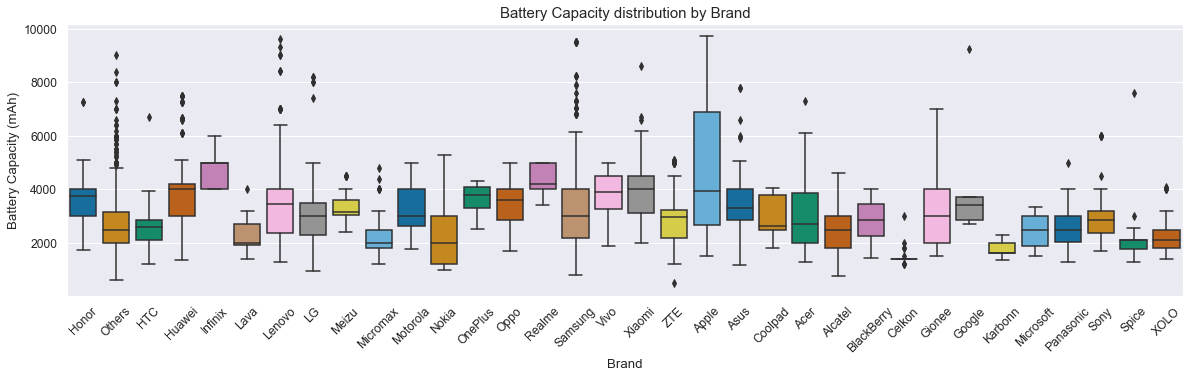

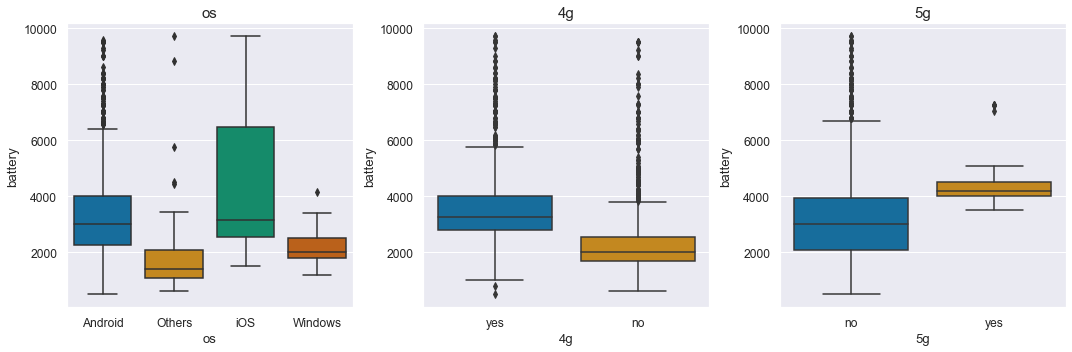

<IPython.core.display.Javascript object>

In [39]:
# checking a relationship between Battery capacity and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="battery", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Battery Capacity distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Battery Capacity (mAh)")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="battery", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* Battery capacities show a lot of variability across categories.
* Apple devices seem to ave the widest distribution of battery capacities, also a bulk of higher values.
* Brands that have higher battery capacities on average: Infinix, Realme, which have IQR's over 4000 mAh. Other brands all have their IQR's under than 4000 mAh. Some brands (Huawei, Vivo, Xiaomi) have their median in or under that value.
* iOS devices have more battery capacity on average, followed by Android and Windows. Other OS devices have the least battery capacity.
* 4G-capable and 5G-capable devices have more battery capacity on average.

##### Weight vs Categorical Variables

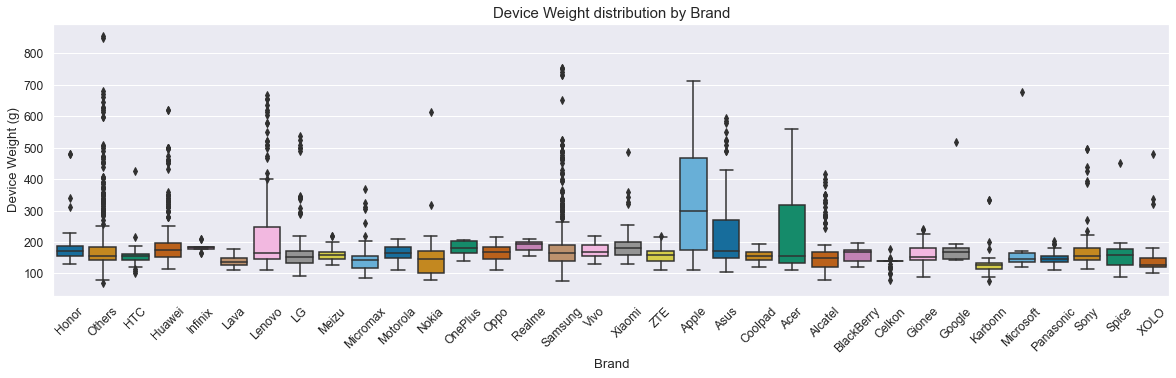

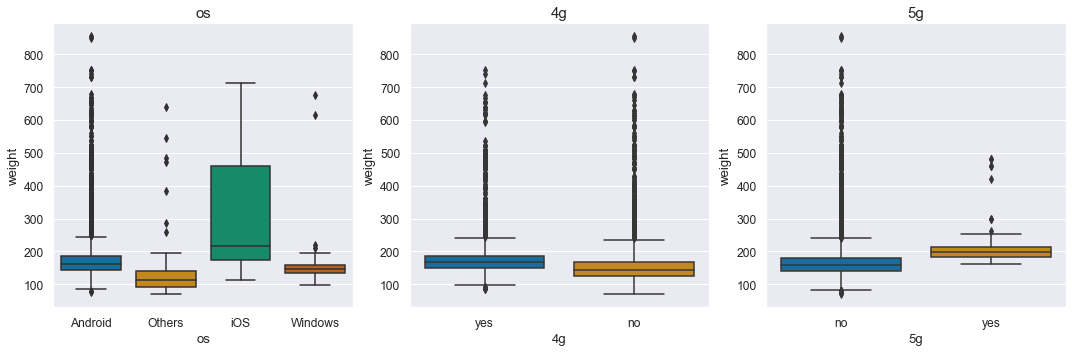

<IPython.core.display.Javascript object>

In [40]:
# checking a relationship between weight and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="weight", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Device Weight distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Device Weight (g)")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="weight", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* Weight show variability across every category.
* Most brands show that most of their devices weigh less than 200 grams. Some brands like Lenovo, Apple, Asus, Acer show higher values for this variable (perhaps many of those are tablets).
* iOS devices have more weight on average, followed by Android and Windows. Other OS devices have the least weight.
* 4G-capable and 5G-capable devices have more weight on average.
* This is consistent with the high correlation between weight and battery capacity.

##### Year of Release vs Categorical Variables

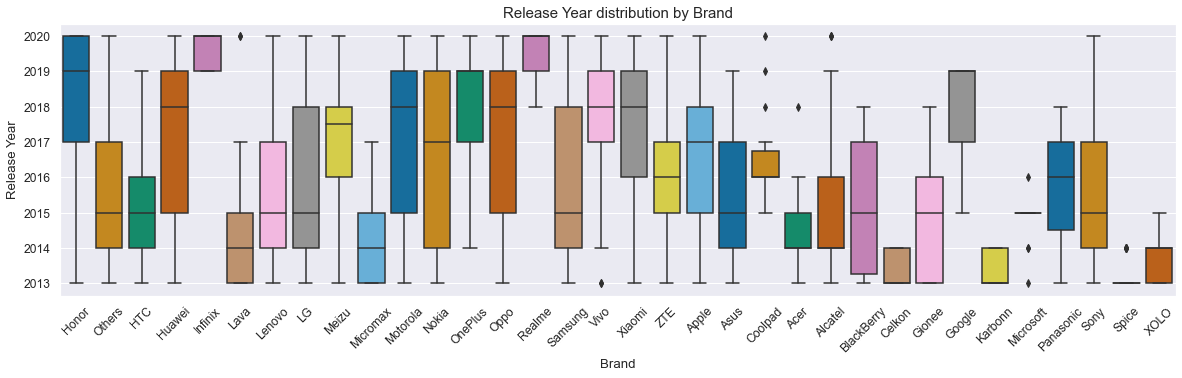

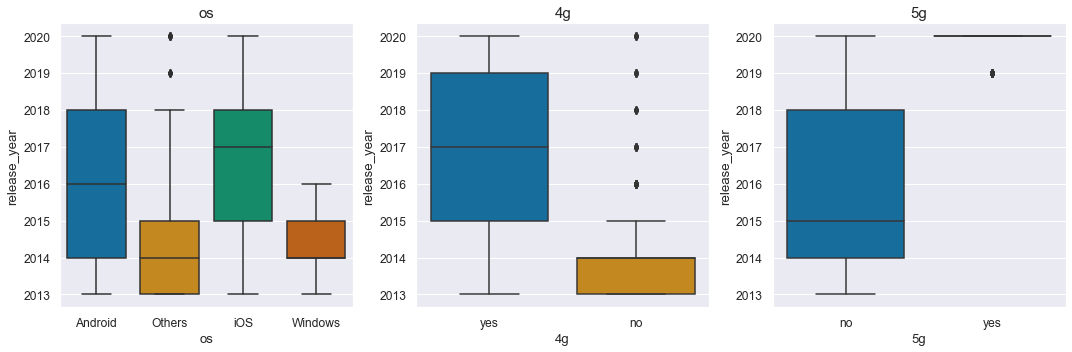

<IPython.core.display.Javascript object>

In [41]:
# checking a relationship between year of release and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="release_year", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Release Year distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Release Year")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="release_year", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* Year of release show variability across every category.
* Brands with newer devices on average: Honor, Infinix, Realme.
* Brands with older devices on average: Lava, Micromax, Acer, Celkon, Karbonn, XOLO.
* iOS and Android devices are on average newer, consistent with standardization.
* 4G-capable and 5G-capable devices newer on average, which is almost self-evident.

##### Days Used vs Categorical Variables

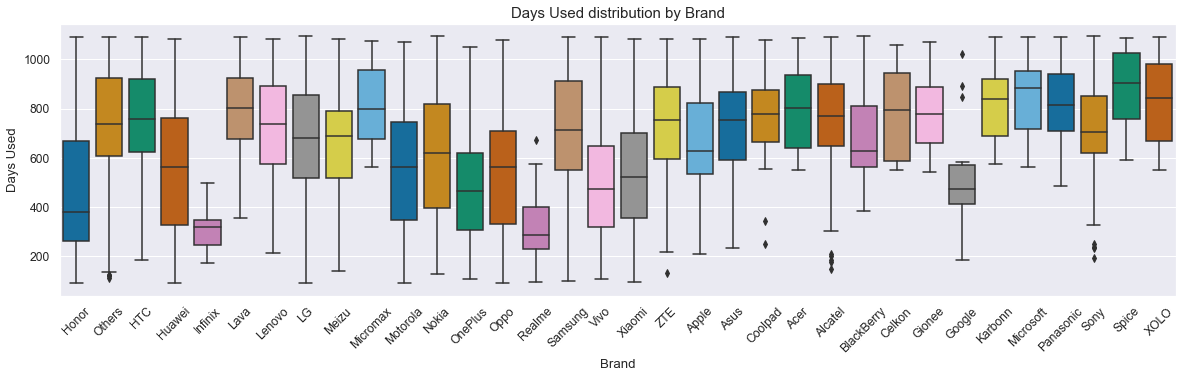

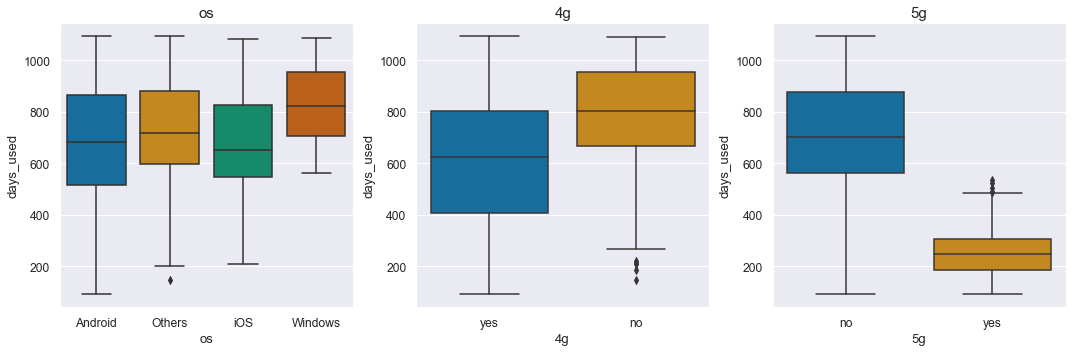

<IPython.core.display.Javascript object>

In [42]:
# checking a relationship between days used and categorical variables

# Behaviour of the used price across brands
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, y="days_used", x="brand_name", palette="colorblind")
plt.xticks(rotation=45)
plt.title("Days Used distribution by Brand", fontsize=15)
plt.xlabel("Brand")
plt.ylabel("Days Used")
plt.show()

cols = ["os", "4g", "5g"]
plt.figure(figsize=(15, 5))

for i, var in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, x=var, y="days_used", palette="colorblind")
    plt.tight_layout()
    plt.title(var, fontsize=15)

plt.show()

**Observations:**

* Days used variable show variability across every category, but across brands the differences are less pronounced.
* Some brands which devices show less use as a bulk (lower IQRs): Honor, Infinix, Realme.
* Almost every brand includes devices that show the maximum days of use observed; the only outliers observed are for a few brands and almost all of them by the lower end (the only exception is Google which shows outliers towards the higher end). 
* Windows devices show more use on average.
* 4G-capable devices show less use on average.
* Thsi difference is more pronounced for 5G-capable devices.

## Data Preprocessing

### Missing Value Treatment

Empty data will be imputed for each variable according to the column median grouped by some of the categorical and/or numerical variables that were observed to have some correlation with the variable being imputed.

When the method fails to impute every missing value, the procedure is repeated dropping one or more of the grouping variables. Using the whole column median is left as a last resort.

In [43]:
data_imp = data.copy()  # preserving original data

# Imputation using the median grouped by categories that seem to affect values and by correlated variables.
# Where needed, further iterations dropping one or more categories or variables are tried.
# Column median used only as last resort.

data_imp["ram"] = data_imp["ram"].fillna(
    value=data_imp.groupby(["brand_name", "os", "5g", "release_year"])["ram"].transform(
        "median"
    )
)

data_imp["selfie_camera_mp"] = data_imp["selfie_camera_mp"].fillna(
    value=data_imp.groupby(["brand_name", "main_camera_mp"])[
        "selfie_camera_mp"
    ].transform("median")
)

data_imp["int_memory"] = data_imp["int_memory"].fillna(
    value=data_imp.groupby(["brand_name", "5g", "main_camera_mp"])[
        "int_memory"
    ].transform("median")
)

data_imp["weight"] = data_imp["weight"].fillna(
    value=data_imp.groupby(["brand_name", "os", "4g", "5g", "screen_size"])[
        "weight"
    ].transform("median")
)
data_imp["weight"] = data_imp["weight"].fillna(
    value=data_imp.groupby(["screen_size"])["weight"].transform("median")
)  # second iteration for the last few rows

data_imp["battery"] = data_imp["battery"].fillna(
    value=data_imp.groupby(["brand_name", "os", "4g", "5g", "screen_size", "weight"])[
        "battery"
    ].transform("median")
)
data_imp["battery"] = data_imp["battery"].fillna(
    value=data_imp.groupby(["screen_size", "weight"])["battery"].transform("median")
)
data_imp["battery"] = data_imp["battery"].fillna(
    value=data_imp.groupby(["screen_size"])["battery"].transform("median")
)
data_imp["battery"] = data_imp["battery"].fillna(value=data_imp["battery"].median())

data_imp["main_camera_mp"] = data_imp["main_camera_mp"].fillna(
    value=data_imp.groupby(["brand_name", "os", "4g", "selfie_camera_mp"])[
        "main_camera_mp"
    ].transform("median")
)
data_imp["main_camera_mp"] = data_imp["main_camera_mp"].fillna(
    value=data_imp.groupby(["selfie_camera_mp"])["main_camera_mp"].transform("median")
)

<IPython.core.display.Javascript object>

In [44]:
data_imp.isna().sum()  # final check

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

### Feature Engineering

A better way to handle the year of release would be to transform the variable into the "device age".

In [45]:
# Device age = data year (2021 as per problem statement) - release year (won't drop the original column yet)

data_imp["device_age"] = 2021 - data_imp["release_year"]

<IPython.core.display.Javascript object>

In [46]:
data_imp.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_age
0,Honor,Android,14.50,yes,no,13.00,5.00,64.00,3.00,3020.00,146.00,2020,127,4.31,4.72,1
1,Honor,Android,17.30,yes,yes,13.00,16.00,128.00,8.00,4300.00,213.00,2020,325,5.16,5.52,1
2,Honor,Android,16.69,yes,yes,13.00,8.00,128.00,8.00,4200.00,213.00,2020,162,5.11,5.88,1
3,Honor,Android,25.50,yes,yes,13.00,8.00,64.00,6.00,7250.00,480.00,2020,345,5.14,5.63,1
4,Honor,Android,15.32,yes,no,13.00,8.00,64.00,3.00,5000.00,185.00,2020,293,4.39,4.95,1


<IPython.core.display.Javascript object>

### Outlier Detection and Eventual Treatment

Let's visualize in a quick way every numerical variable using boxplots:

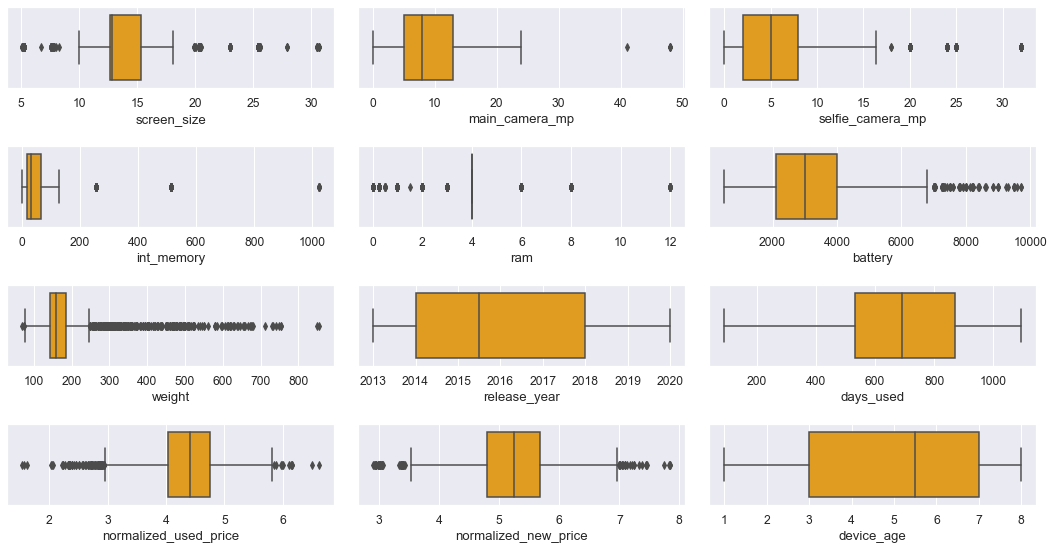

<IPython.core.display.Javascript object>

In [47]:
# outlier detection using boxplot
num_cols = data_imp.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data_imp, x=variable, color="orange")
    plt.tight_layout(pad=2)

plt.show()

For the variables that show the most extreme outliers, let's visualize in detail their relationship with the target variable:

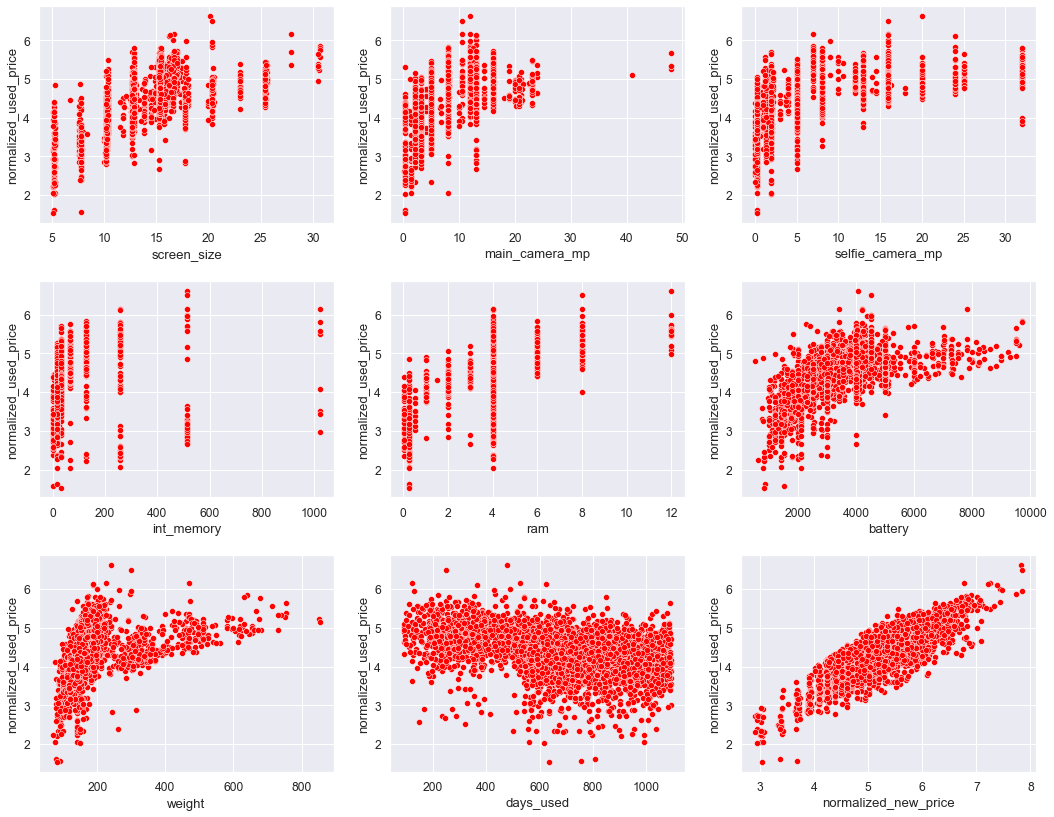

<IPython.core.display.Javascript object>

In [48]:
# outlier detection using scatter plots vs normalized_used_price

cols = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "days_used",
    "normalized_new_price",
]

plt.figure(figsize=(15, 15))

for i, variable in enumerate(cols):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(data=data_imp, y="normalized_used_price", x=variable, color="red")
    plt.tight_layout(pad=2)

plt.show()

**Observation:**

* In almost every scatter plot can be noticed a few extreme values at the bottom that seem to diverge from the rest of the dot cloud (normalized price < 2 Euro).
* Other "outliers" look as if they group in clusters and don't really represent "bad" data.
* In particular, extreme **main_camera_mp** values still seem to follow the visual trend of the price vs MP and shouldn't impair the model results.

Let's check those low-price odd data points:

In [49]:
data_imp[data_imp["normalized_used_price"] < 2]  # these

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_age
323,Micromax,Android,7.75,no,no,0.30,0.30,0.50,0.25,1500.00,89.00,2014,757,1.57,3.69,7
533,Alcatel,Others,5.18,no,no,0.30,0.30,16.00,0.25,850.00,77.90,2014,809,1.62,3.37,7
885,Others,Others,5.08,no,no,0.30,0.30,32.00,0.25,820.00,80.00,2013,636,1.54,3.04,8


<IPython.core.display.Javascript object>

These are just 3 rows with a significant potential to distort the LR model, and that could be dropped without harming the overall performance.

In [50]:
data_imp.drop(data_imp[data_imp["normalized_used_price"] < 2].index, inplace=True)
data_imp.shape

(3451, 16)

<IPython.core.display.Javascript object>

In [51]:
data_imp.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [52]:
data_imp.tail()  # check new index

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_age
3446,Asus,Android,15.34,yes,no,13.00,8.00,64.00,6.00,5000.00,190.00,2019,232,4.49,6.48,2
3447,Asus,Android,15.24,yes,no,13.00,8.00,128.00,8.00,4000.00,200.00,2018,541,5.04,6.25,3
3448,Alcatel,Android,15.80,yes,no,13.00,5.00,32.00,3.00,4000.00,165.00,2020,201,4.36,4.53,1
3449,Alcatel,Android,15.80,yes,no,13.00,5.00,32.00,2.00,4000.00,160.00,2020,149,4.35,4.62,1
3450,Alcatel,Android,12.83,yes,no,13.00,5.00,16.00,2.00,4000.00,168.00,2020,176,4.13,4.28,1


<IPython.core.display.Javascript object>

The following steps will be done after the check-up EDA:
* Preparing data for modeling
* Other preprocessing steps

## EDA (re-check)

- It is a good idea to explore the data once again after manipulating it.

In [53]:
# new column sets for data_imp analysis

num_cols_2 = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "device_age",
    "days_used",
    "normalized_used_price",
    "normalized_new_price",
]  # will analyze new col "device_age" instead of "release_year"

cat_cols_2 = ["brand_name", "os", "4g", "5g"]

<IPython.core.display.Javascript object>

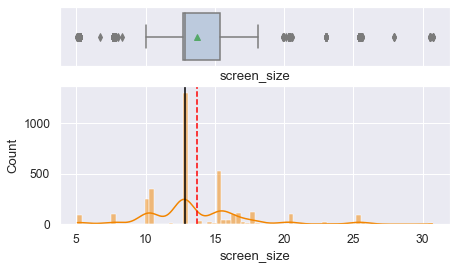

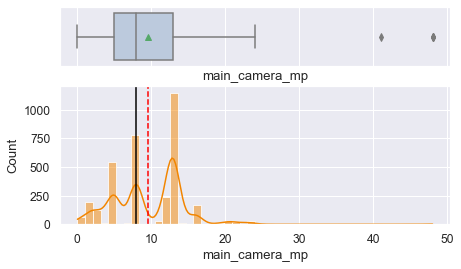

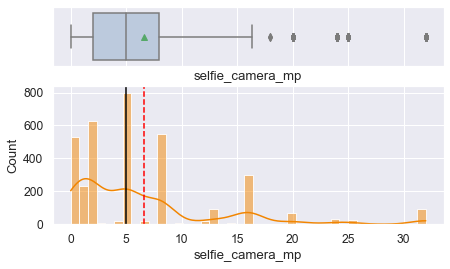

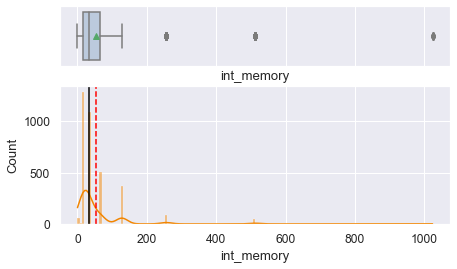

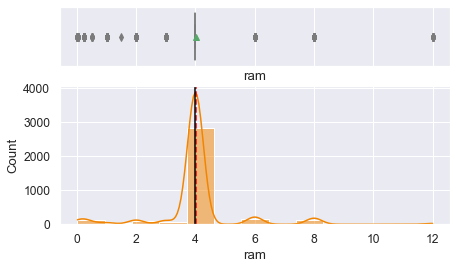

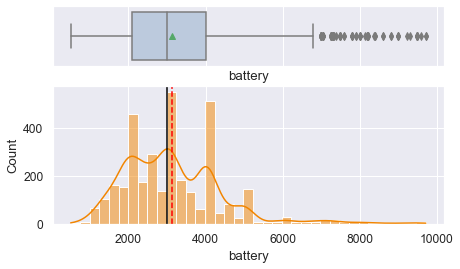

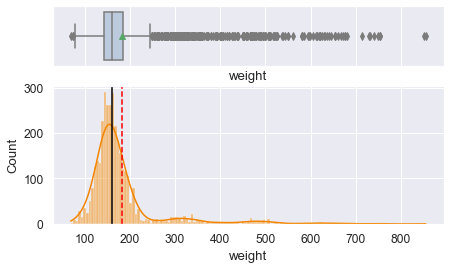

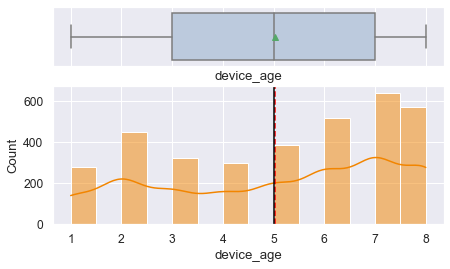

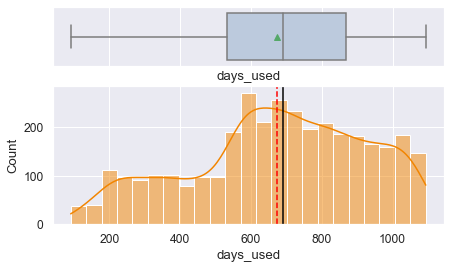

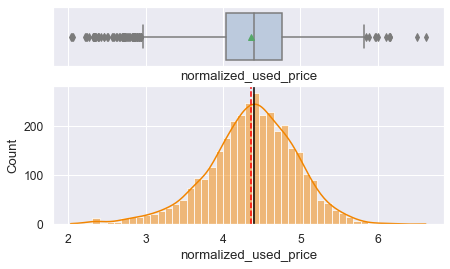

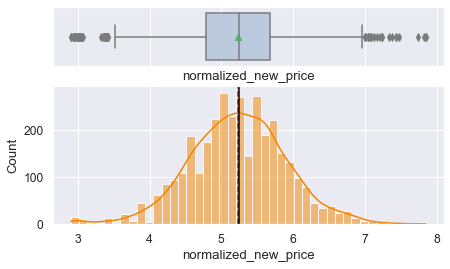

<IPython.core.display.Javascript object>

In [54]:
for cat in num_cols_2:

    histogram_boxplot(data_imp, cat, figsize=(7, 4), kde=True)

**Observation:**

* Missing value imputation doesn't have a noticeable effect on these visuals
* Outlier drop can be (barely) noticed in the price variables visuals.

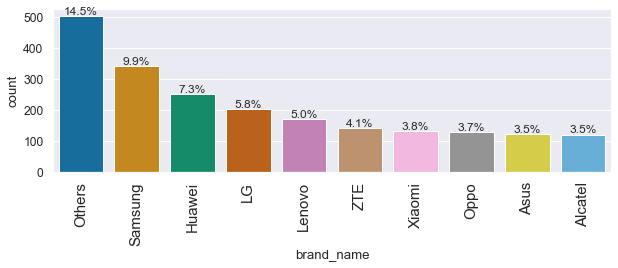

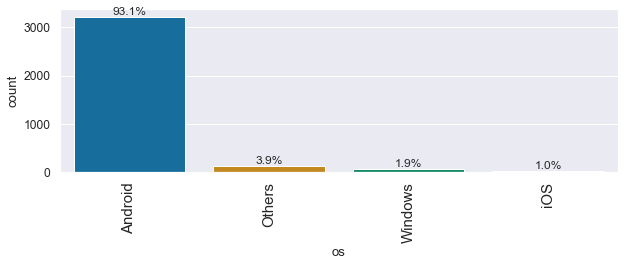

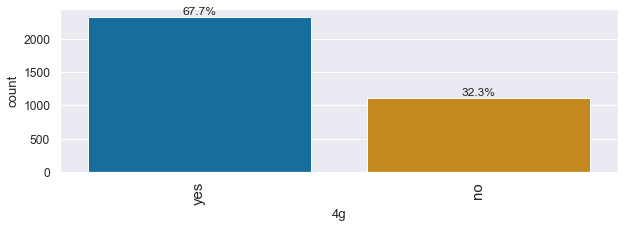

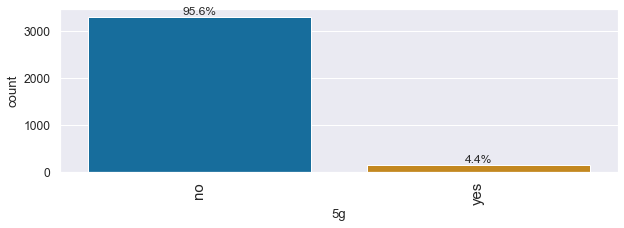

<IPython.core.display.Javascript object>

In [55]:
for cat in cat_cols_2:

    labeled_barplot(
        data_imp, cat, size=3, perc=True, n=10
    )  # only top 10 brands are displayed

**Observation:**

* No significant effect in categorical visuals.

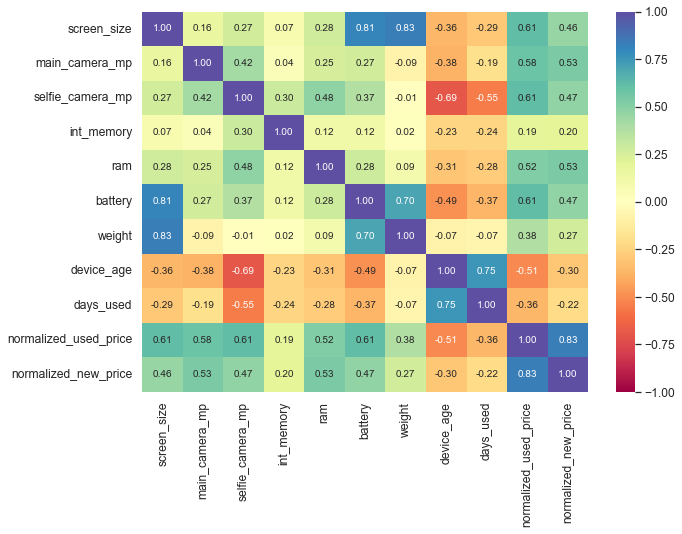

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    data_imp[num_cols_2].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**

* No significant effect in correlations.

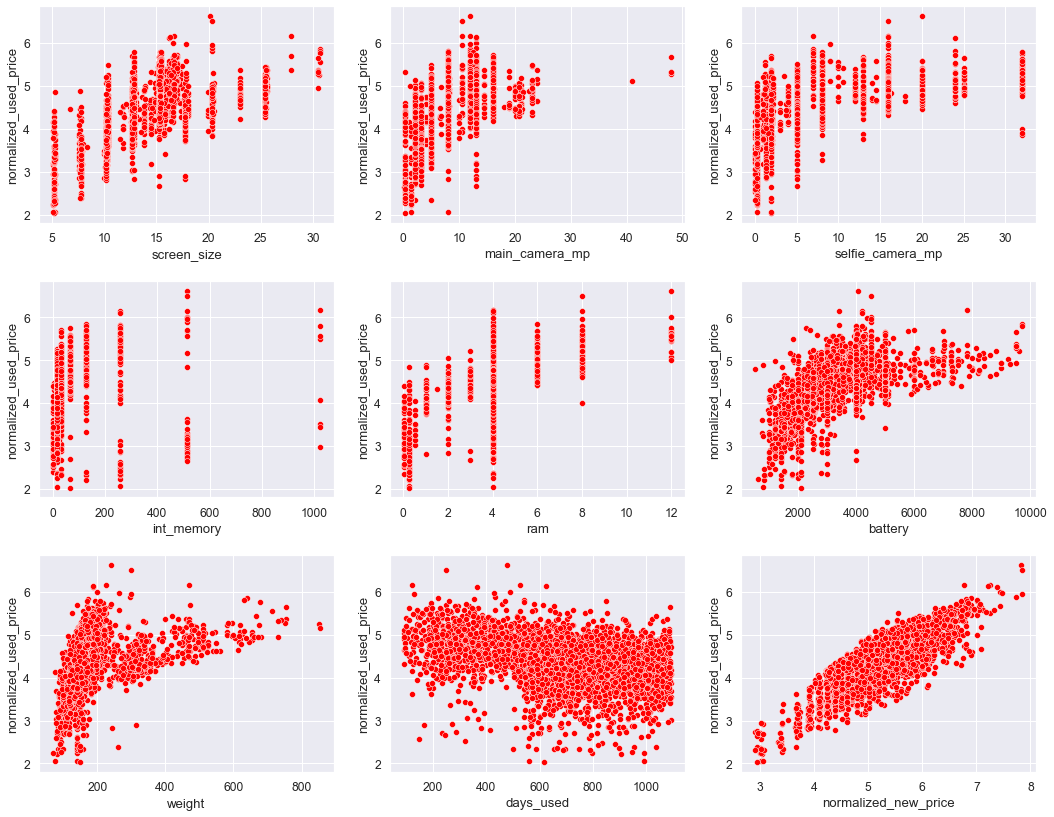

<IPython.core.display.Javascript object>

In [57]:
cols = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "days_used",
    "normalized_new_price",
]

plt.figure(figsize=(15, 15))

for i, variable in enumerate(cols):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(data=data_imp, y="normalized_used_price", x=variable, color="red")
    plt.tight_layout(pad=2)

plt.show()

**Observation:**

The 3 odd points were dropped, and the scatter clouds look more consistent.

## Model Building - Linear Regression

This part involves data preparation for the model building.

In [58]:
# split dependent variable vs independent ones

df_dep = data_imp["normalized_used_price"]
df_indep = data_imp.drop(["normalized_used_price"], axis=1)

<IPython.core.display.Javascript object>

In [59]:
# adding intersect or constant column
df_indep = sm.add_constant(df_indep)

<IPython.core.display.Javascript object>

In [60]:
# adding dummies
df_indep = pd.get_dummies(
    df_indep, columns=["brand_name", "os", "4g", "5g"], drop_first=True
)

# df_indep.head() # check up

<IPython.core.display.Javascript object>

In [61]:
# dropping useless and redundant column(s)
df_indep.drop(["release_year"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [62]:
# split data into train and test sets. 30% of the dataset will be kept as the test set
X_train, X_test, y_train, y_test = train_test_split(
    df_indep, df_dep, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [63]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.848
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     274.3
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:38:33   Log-Likelihood:                 154.95
No. Observations:                   2415   AIC:                            -211.9
Df Residuals:                       2366   BIC:                             71.79
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

**Observation:**
    
* R-squared value looks good (no underfitting)
* Almost every dummy variable p-value is consistently high. Also the **int_memory** variable shows a high p-value. This will get checked again after correcting multi-collinearity
* The model warns there are numerical problems and/or multicollinearity issues.
* Aside from that, the variable that seem to affect the target variable the most is **normalized_new_price**.
* Other numerical variables with significative effect: **screen_size**, **main_camera_mp**, **selfie_camera_mp**, **ram**, and **device_age**.
* Constant value is 1.4281 euro

## Model Performance Check

The preliminary model will get tested for prediction errors, under and over fitting.

In [64]:
# code for building a table (data frame) comparing performance of the model
# It's based on RMSE, MAE and R-squared, for train vs test sets.
# More metrics like adjusted R-squared, MAPE, ... could be used but the choice is to keep it simple and effective enough.


def model_performance(model, X_train, X_test, y_train, y_test):

    y_pred = model.predict(
        X_test
    )  # dependent variable predictions using model and test set of independent variables

    # RMSE on the train data vs test data
    RMSE_train = np.sqrt(
        mean_squared_error(y_train.values.flatten(), model.fittedvalues.values)
    )
    RMSE_test = np.sqrt(
        mean_squared_error(y_test.values.flatten(), model.predict(X_test))
    )
    RMSE_pc = round(100 * (RMSE_test / RMSE_train - 1), 2)

    # MAE on the train data vs test data
    MAE_train = mean_absolute_error(y_train.values.flatten(), model.fittedvalues.values)
    MAE_test = mean_absolute_error(y_test.values.flatten(), model.predict(X_test))
    MAE_pc = round(100 * (MAE_test / MAE_train - 1), 2)

    # R-squared on the train data vs test data
    R2_train = r2_score(y_train.values.flatten(), model.fittedvalues.values)
    R2_test = r2_score(y_test.values.flatten(), model.predict(X_test))
    R2_pc = round(100 * (R2_test / R2_train - 1), 2)

    # Build DataFrame
    perf_df = pd.DataFrame(
        {
            "Training Set": [RMSE_train, MAE_train, R2_train],
            "Testing Set": [RMSE_test, MAE_test, R2_test],
            "% Difference": [RMSE_pc, MAE_pc, R2_pc],
        },
        index=["RMSE", "MAE", "R-squared"],
    )
    return perf_df

<IPython.core.display.Javascript object>

In [65]:
model_performance(olsres, X_train, X_test, y_train, y_test)

,Training Set,Testing Set,% Difference
RMSE,0.23,0.24,3.73
MAE,0.18,0.18,3.59
R-squared,0.85,0.84,-1.00


<IPython.core.display.Javascript object>

**Observations:**

* The measures of error used (RMSE, MAE and R-squared) are very similar between the results obtained by the train dataset and the test dataset.
* The model doesn't seem to be overfitting.
* R-squared is above 0.8, which is a potent signal to discard underfitting.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Multicollinearity

A threshold value of 3 will be used to select variables for eventual dropping.

In [66]:
# checking multicollinearity

# function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


# function to check effect of removing each multicollinear variable on the model performance
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [67]:
checking_vif(X_train)

,feature,VIF
0,const,223.40
1,screen_size,7.76
2,main_camera_mp,2.29
3,selfie_camera_mp,2.87
4,int_memory,1.29
5,ram,2.31
6,battery,4.61
7,weight,6.33
8,days_used,2.61
9,normalized_new_price,3.16


<IPython.core.display.Javascript object>

In [68]:
# list of high VIF columns (VIF > 3)
col_list = ["battery", "weight", "normalized_new_price", "device_age"]

# screen_size will be incorporated only as a last resort as it shows a high prediction value.
# normalized_new_price is only included as reference. It will not be dropped, for the same reason.

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.84,0.23
1,device_age,0.84,0.23
2,weight,0.84,0.23
3,normalized_new_price,0.77,0.28


<IPython.core.display.Javascript object>

In [69]:
col_to_drop = "weight"  # highest VIF variable first
X_train_2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test_2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF again
vif = checking_vif(X_train_2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,209.63
1,screen_size,4.02
2,main_camera_mp,2.21
3,selfie_camera_mp,2.84
4,int_memory,1.29
5,ram,2.30
6,battery,4.08
7,days_used,2.60
8,normalized_new_price,3.16
9,device_age,4.70


<IPython.core.display.Javascript object>

In [70]:
# list of high VIF columns (adding days_used for check up)
col_list = ["battery", "device_age", "normalized_new_price"]

res = treating_multicollinearity(X_train_2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.84,0.23
1,device_age,0.84,0.23
2,normalized_new_price,0.76,0.28


<IPython.core.display.Javascript object>

In [71]:
col_to_drop = "device_age"  # highest VIF
X_train_3 = X_train_2.loc[:, ~X_train_2.columns.str.startswith(col_to_drop)]
X_test_3 = X_test_2.loc[:, ~X_test_2.columns.str.startswith(col_to_drop)]

# Check VIF again
vif = checking_vif(X_train_3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  device_age


,feature,VIF
0,const,206.79
1,screen_size,4.01
2,main_camera_mp,2.18
3,selfie_camera_mp,2.45
4,int_memory,1.28
5,ram,2.30
6,battery,4.03
7,days_used,1.82
8,normalized_new_price,2.93
9,brand_name_Alcatel,3.33


<IPython.core.display.Javascript object>

In [72]:
# list of high VIF columns, third iteration

col_list = ["screen_size", "battery", "normalized_new_price"]

# checking if dropping days_used (heavily correlated with device_age) can improve the latter's VIF and save it,
# being a more valuable independent variable for the model

res = treating_multicollinearity(X_train_2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.84,0.23
1,screen_size,0.82,0.25
2,normalized_new_price,0.76,0.28


<IPython.core.display.Javascript object>

In [73]:
col_to_drop = "battery"  # high VIF, lowest effect on model performance

X_train_4 = X_train_3.loc[:, ~X_train_3.columns.str.startswith(col_to_drop)]
X_test_4 = X_test_3.loc[:, ~X_test_3.columns.str.startswith(col_to_drop)]

# Check VIF again
vif = checking_vif(X_train_4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  battery


,feature,VIF
0,const,203.10
1,screen_size,1.62
2,main_camera_mp,2.18
3,selfie_camera_mp,2.45
4,int_memory,1.28
5,ram,2.30
6,days_used,1.80
7,normalized_new_price,2.92
8,brand_name_Alcatel,3.32
9,brand_name_Apple,13.72


<IPython.core.display.Javascript object>

### Significance of Dependent Variables (p-values)

Now that every numerical column shows an acceptable VIF (under 3), let's check the model again and correct for the significance of every dependent variable. The model tests every variable, the null hypothesis being that said variable is non significant. A low p-value, under 0.05, is taken as evidence to reject the null hypothesis.

In [74]:
olsmod_4 = sm.OLS(y_train, X_train_4)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     281.9
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:38:35   Log-Likelihood:                 115.71
No. Observations:                   2415   AIC:                            -139.4
Df Residuals:                       2369   BIC:                             126.9
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

In [75]:
model_performance(olsres_4, X_train_4, X_test_4, y_train, y_test)

,Training Set,Testing Set,% Difference
RMSE,0.23,0.24,2.86
MAE,0.18,0.19,2.39
R-squared,0.84,0.84,-0.71


<IPython.core.display.Javascript object>

"os" dummies have consistently high p-values, meaning the categorical variable **os** is not significant. We will drop those dummies from the model and check the model again.

In [76]:
col_to_drop = "os_"
X_train_5 = X_train_4.loc[:, ~X_train_4.columns.str.startswith(col_to_drop)]
X_test_5 = X_test_4.loc[:, ~X_test_4.columns.str.startswith(col_to_drop)]
X_train_5.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,days_used,normalized_new_price,brand_name_Alcatel,brand_name_Apple,...,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,4g_yes,5g_yes
1125,1.00,12.70,13.00,5.00,32.00,4.00,727,5.14,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,1.00,12.70,8.00,5.00,16.00,4.00,583,5.13,0,0,...,0,0,0,0,0,0,0,0,1,0
2905,1.00,12.70,5.00,2.00,16.00,4.00,1065,4.78,0,0,...,0,0,0,0,0,0,0,0,0,0
103,1.00,10.16,2.00,0.30,0.50,0.25,1016,3.93,0,0,...,0,0,0,0,0,0,0,0,0,0
1398,1.00,10.34,13.00,1.30,16.00,4.00,1016,5.35,0,0,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [77]:
olsmod_5 = sm.OLS(y_train, X_train_5)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     302.2
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:38:35   Log-Likelihood:                 114.79
No. Observations:                   2415   AIC:                            -143.6
Df Residuals:                       2372   BIC:                             105.4
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

In [78]:
model_performance(olsres_5, X_train_5, X_test_5, y_train, y_test)

,Training Set,Testing Set,% Difference
RMSE,0.23,0.24,2.74
MAE,0.18,0.18,2.24
R-squared,0.84,0.84,-0.67


<IPython.core.display.Javascript object>

Next the brand dummies with high p-values will be dropped (Celkon and Sony dummies will be kept).

In [79]:
cols_to_keep = [
    "const",
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "days_used",
    "normalized_new_price",
    "brand_name_Celkon",
    "brand_name_Sony",
    "4g_yes",
    "5g_yes",
]
X_train_6 = X_train_5.loc[:, cols_to_keep]
X_test_6 = X_test_5.loc[:, cols_to_keep]

<IPython.core.display.Javascript object>

In [80]:
olsmod_6 = sm.OLS(y_train, X_train_6)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1148.
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:38:35   Log-Likelihood:                 96.616
No. Observations:                   2415   AIC:                            -169.2
Df Residuals:                       2403   BIC:                            -99.76
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [81]:
model_performance(olsres_6, X_train_6, X_test_6, y_train, y_test)

,Training Set,Testing Set,% Difference
RMSE,0.23,0.24,1.78
MAE,0.18,0.18,0.93
R-squared,0.84,0.84,-0.31


<IPython.core.display.Javascript object>

The model performance is still high, and some measures of overfitting improved. Now the highest p-value corresponds to the 5G dummy.

In [82]:
col_to_drop = "5g_yes"
X_train_7 = X_train_6.loc[:, ~X_train_6.columns.str.startswith(col_to_drop)]
X_test_7 = X_test_6.loc[:, ~X_test_6.columns.str.startswith(col_to_drop)]
X_train_7.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,days_used,normalized_new_price,brand_name_Celkon,brand_name_Sony,4g_yes
1125,1.00,12.70,13.00,5.00,32.00,4.00,727,5.14,0,0,0
1519,1.00,12.70,8.00,5.00,16.00,4.00,583,5.13,0,0,1
2905,1.00,12.70,5.00,2.00,16.00,4.00,1065,4.78,0,0,0
103,1.00,10.16,2.00,0.30,0.50,0.25,1016,3.93,0,0,0
1398,1.00,10.34,13.00,1.30,16.00,4.00,1016,5.35,0,0,1


<IPython.core.display.Javascript object>

In [83]:
olsmod_7 = sm.OLS(y_train, X_train_7)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1263.
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:38:35   Log-Likelihood:                 96.569
No. Observations:                   2415   AIC:                            -171.1
Df Residuals:                       2404   BIC:                            -107.5
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [84]:
model_performance(olsres_7, X_train_7, X_test_7, y_train, y_test)

,Training Set,Testing Set,% Difference
RMSE,0.23,0.24,1.77
MAE,0.18,0.18,0.91
R-squared,0.84,0.84,-0.31


<IPython.core.display.Javascript object>

Finally, the **days_used** variable will be dropped from the model.

In [85]:
col_to_drop = "days_used"
X_train_8 = X_train_7.loc[:, ~X_train_7.columns.str.startswith(col_to_drop)]
X_test_8 = X_test_7.loc[:, ~X_test_7.columns.str.startswith(col_to_drop)]
X_train_8.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,normalized_new_price,brand_name_Celkon,brand_name_Sony,4g_yes
1125,1.00,12.70,13.00,5.00,32.00,4.00,5.14,0,0,0
1519,1.00,12.70,8.00,5.00,16.00,4.00,5.13,0,0,1
2905,1.00,12.70,5.00,2.00,16.00,4.00,4.78,0,0,0
103,1.00,10.16,2.00,0.30,0.50,0.25,3.93,0,0,0
1398,1.00,10.34,13.00,1.30,16.00,4.00,5.35,0,0,1


<IPython.core.display.Javascript object>

In [86]:
olsmod_8 = sm.OLS(y_train, X_train_8)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1404.
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:38:35   Log-Likelihood:                 96.406
No. Observations:                   2415   AIC:                            -172.8
Df Residuals:                       2405   BIC:                            -114.9
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [87]:
model_performance(olsres_8, X_train_8, X_test_8, y_train, y_test)

,Training Set,Testing Set,% Difference
RMSE,0.23,0.24,1.78
MAE,0.18,0.18,0.93
R-squared,0.84,0.84,-0.31


<IPython.core.display.Javascript object>

In [88]:
# Re-check VIF (v8)
checking_vif(X_train_8)

,feature,VIF
0,const,78.34
1,screen_size,1.30
2,main_camera_mp,1.82
3,selfie_camera_mp,1.81
4,int_memory,1.18
5,ram,1.60
6,normalized_new_price,2.28
7,brand_name_Celkon,1.11
8,brand_name_Sony,1.05
9,4g_yes,1.75


<IPython.core.display.Javascript object>

Now that multicollinearity and significance of variables has been corrected, the residuals will be tested for linearity, independence, normality and homoscedasticity.

### Testing for Residuals: Linearity and Independence

In [89]:
# Predictions and residuals data frame for model N° 8, for LR assumption analyses

df_pred_8 = pd.DataFrame(
    {
        "Data Values": y_train.values.flatten(),  # actual values
        "Fitted Values": olsres_8.fittedvalues.values,  # predicted values
        "Residuals": olsres_8.resid.values,
    }
)  # residuals

df_pred_8.head()

,Data Values,Fitted Values,Residuals
0,4.32,4.28,0.04
1,4.14,4.25,-0.11
2,3.80,3.93,-0.14
3,3.04,3.33,-0.29
4,3.96,4.27,-0.31


<IPython.core.display.Javascript object>

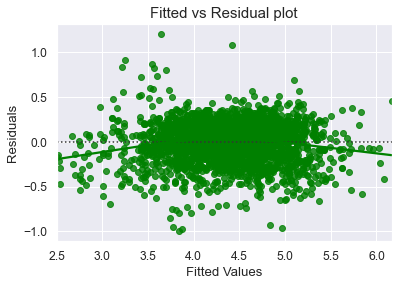

<IPython.core.display.Javascript object>

In [90]:
# visual test for linearity and independence
sns.residplot(
    data=df_pred_8, x="Fitted Values", y="Residuals", color="green", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot", fontsize=15)
plt.show()

**Observations:**

* The residuals cloud doesn't show a pattern, even if has some odd values towards the lower end. Independence and linearity can be assumed.

### Testing for Residuals: Normality

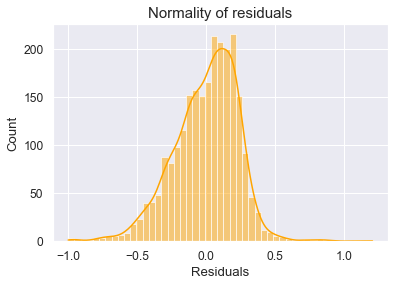

<IPython.core.display.Javascript object>

In [91]:
# normality check up
sns.histplot(df_pred_8["Residuals"], kde=True, color="orange")
plt.title("Normality of residuals", fontsize=15)
plt.show()

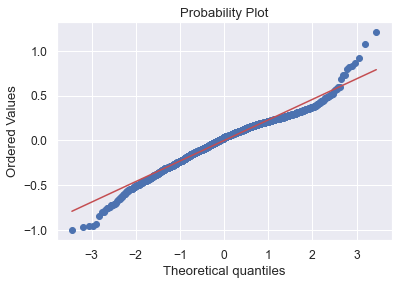

<IPython.core.display.Javascript object>

In [92]:
stats.probplot(df_pred_8["Residuals"], dist="norm", plot=pylab)
plt.show()

In [93]:
print("Shapiro-Wilk test p-value:", stats.shapiro(df_pred_8["Residuals"])[1])

Shapiro-Wilk test p-value: 5.36720954904691e-20


<IPython.core.display.Javascript object>

**Observations:**

* The residuals distribution show some asymmetry.
* The Q-Q plot shows deviations from normal, especially towards the tails.
* The Shapiro-Wilk test rejects the null hypothesis of normality.

### Testing for Residuals: Homoscedasticity

To test for Homoscedasticity, the Goldfeld–Quandt test will be used:

In [94]:
print(
    "Goldfeld–Quandt test p-value:",
    sms.het_goldfeldquandt(df_pred_8["Residuals"], X_train_8)[1],
)

Goldfeld–Quandt test p-value: 0.20819694011738984


<IPython.core.display.Javascript object>

The residuals are homoscedastic.

### Correction of Normality Issues

Since the residuals distribute in a non symmetric way and there are important deviations by the tails, dropping variables with highest variability and/or significant correlation with others seems like a sensible solution.

In particular:
* **selfie_camera_mp** has a big variability, many outliers, and it's correlated with the **main_camera_mp** variable.
* **int_memory** also has a big variability, extreme outliers, and a very small effect on the target variable.
* **ram** will be dropped too, as it has a huge variability.

Then, performance and residuals will get checked again.

In [95]:
cols_to_drop = ["selfie_camera_mp", "int_memory", "ram"]
X_train_9 = X_train_8.loc[:, ~X_train_8.columns.isin(cols_to_drop)]
X_test_9 = X_test_8.loc[:, ~X_test_8.columns.isin(cols_to_drop)]
X_train_9.head()

,const,screen_size,main_camera_mp,normalized_new_price,brand_name_Celkon,brand_name_Sony,4g_yes
1125,1.00,12.70,13.00,5.14,0,0,0
1519,1.00,12.70,8.00,5.13,0,0,1
2905,1.00,12.70,5.00,4.78,0,0,0
103,1.00,10.16,2.00,3.93,0,0,0
1398,1.00,10.34,13.00,5.35,0,0,1


<IPython.core.display.Javascript object>

In [96]:
olsmod_9 = sm.OLS(y_train, X_train_9)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.810
Model:                               OLS   Adj. R-squared:                  0.810
Method:                    Least Squares   F-statistic:                     1711.
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:38:38   Log-Likelihood:                -112.05
No. Observations:                   2415   AIC:                             238.1
Df Residuals:                       2408   BIC:                             278.6
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [97]:
model_performance(olsres_9, X_train_9, X_test_9, y_train, y_test)

,Training Set,Testing Set,% Difference
RMSE,0.25,0.25,0.03
MAE,0.20,0.20,0.18
R-squared,0.81,0.81,0.43


<IPython.core.display.Javascript object>

In [98]:
# Predictions and residuals data frame for model N° 9
df_pred_9 = pd.DataFrame(
    {
        "Data Values": y_train.values.flatten(),  # actual values
        "Fitted Values": olsres_9.fittedvalues.values,  # predicted values
        "Residuals": olsres_9.resid.values,
    }
)  # residuals
df_pred_9.head()

,Data Values,Fitted Values,Residuals
0,4.32,4.26,0.05
1,4.14,4.29,-0.15
2,3.80,3.92,-0.13
3,3.04,3.34,-0.30
4,3.96,4.39,-0.43


<IPython.core.display.Javascript object>

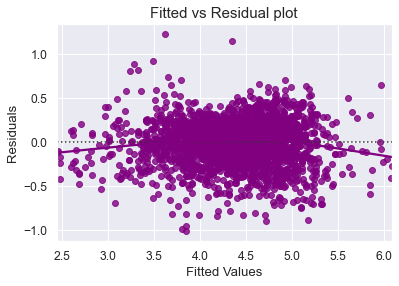

<IPython.core.display.Javascript object>

In [99]:
# visual test for linearity and independence
sns.residplot(
    data=df_pred_9, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot", fontsize=15)
plt.show()

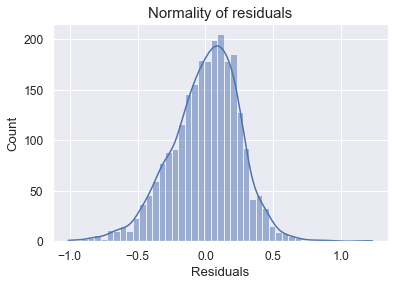

<IPython.core.display.Javascript object>

In [100]:
# normality check up
sns.histplot(df_pred_9["Residuals"], kde=True)
plt.title("Normality of residuals", fontsize=15)
plt.show()

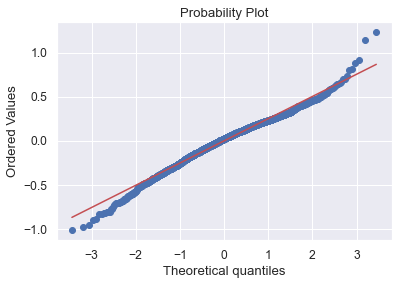

<IPython.core.display.Javascript object>

In [101]:
stats.probplot(df_pred_9["Residuals"], dist="norm", plot=pylab)
plt.show()

In [102]:
print("Shapiro-Wilk test p-value:", stats.shapiro(df_pred_9["Residuals"])[1])

Shapiro-Wilk test p-value: 2.6626685678912167e-14


<IPython.core.display.Javascript object>

In [103]:
print(
    "Goldfeld-Quandt test p-value:",
    sms.het_goldfeldquandt(df_pred_9["Residuals"], X_train_9)[1],
)

Goldfeld-Quandt test p-value: 0.35580809669256896


<IPython.core.display.Javascript object>

The effects of these eliminations are positive:

* Model performance is still good:
    * R-squared is over 0.8 (no underfitting)
    * Differences in performance parameters between training and testing datasets differ by less than 0.5% so the model is not overfitting either.
    * The numerical problems alert was eliminated.
    * The model is simpler, which is indeed a good thing.
* Independence and linearity was not affected.
* Residual distribution looks much more symmetrical.
* The Q-Q plot shows much better adherence to normality (even if deviations still exist by the tails).
* The Shapiro-Wilk test still rejects the normality hypothesis (even if the p-value diminished by orders of magnitude). This is a "good enough" approximation with the given dataset.
* The residuals are homoscedastic.

Given the former, model N°9 will be selected as the final version.

## Final Model

Summary, performance evaluation and parameters of the definitive model are presented below:

In [104]:
print(olsres_9.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.810
Model:                               OLS   Adj. R-squared:                  0.810
Method:                    Least Squares   F-statistic:                     1711.
Date:                   Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                           18:38:40   Log-Likelihood:                -112.05
No. Observations:                   2415   AIC:                             238.1
Df Residuals:                       2408   BIC:                             278.6
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [105]:
model_performance(olsres_9, X_train_9, X_test_9, y_train, y_test)

,Training Set,Testing Set,% Difference
RMSE,0.25,0.25,0.03
MAE,0.20,0.20,0.18
R-squared,0.81,0.81,0.43


<IPython.core.display.Javascript object>

In [106]:
olsres_9.params

const                   1.01
screen_size             0.05
main_camera_mp          0.02
normalized_new_price    0.46
brand_name_Celkon      -0.20
brand_name_Sony        -0.15
4g_yes                  0.14
dtype: float64

<IPython.core.display.Javascript object>

Comments about the parameters and model performance will be presented with the final insights.

## Actionable Insights and Recommendations 

* **Regarding the model general performance and validity:**
    * The final regression model explains about 81% of the target variable variance. It can be said that the model is not underfitted.
    * Also, the mean absolute error indicates that the model normalized used price predictions should differ from reality by 0.2 Euro on average.
    * RMSE and MAE dont' change more than 0.2% and R-squared doesn't change more than 0.5% when applying the model to the testing data set. This means the model is not overfitted.
    * While (formally) the model residuals fail the assumption of normality, the distribution of residuals is very close to normal (with some issues toward the tails).
    * The model residuals meet the assumptions of independence, linearity and homoscedasticity.
    * It can be concluded that in spite of certain limitations, the model is a good approximation for prediction and inference purposes.
* **Regarding the model parameters (all affirmations are *ceteris paribus*, meaning all else being constant:**
    * The preicted price is composed of a constant of 1.01 euro, plus the following effects.
    * Screen Size, measured in centimeters, accounts for 0.05 euro/cm.
    * Main Camera's MP accounts for 0.02 euro/MP.
    * Each Euro of Normalized New Price explains 0.46 euro of the Normalized Used Price.
    * An used device of the brand Celkon is 0.20 euro cheaper.
    * An used device of the bran Sony is 0.15 euro cheaper. This is counterintuitive given that Sony devices look in fact more expensive in the relevant visualization. In this case it means that the brand causes a cheaper price than expected given the device's other attributes.
    * A 4G-capable device price is 0.14 euro higher.
    * Other variables had incidence in the normalized used price, but their effect were redundant. For instance, it can be said that Apple devices are more expensive, but that effect was better captured by other attributes of this brand's devices.
* **Further research could add more variables to the data set, enriching the regression analysis:**
    * A categorical variable that distinguishes if the device is a Phone vs a Tablet.
    * Recovering the model name of the device from the original data would help review data points that look odd.
    * Including the original values for used and new prices would allow for additional features in the analysis, like price discount (used vs new).
    * Condition data is missed (refurbished, general wear, presence of screen scratches, etc.).

___